In [2]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# KMeans

In [62]:
def kmeans_clustering(datasets):
    cluster_range = range(2, 11)

    results = {ngram: {"clusters": [], "silhouette": [], "calinski": [], "davies": []} for ngram in datasets}
    labels = []
    # Grid search
    for ngram, data in datasets.items():
        for k in cluster_range:
            kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto').fit(data)
            labels = kmeans.labels_
            results[ngram]["clusters"].append(k)
            results[ngram]["silhouette"].append(silhouette_score(data, labels))
            results[ngram]["calinski"].append(calinski_harabasz_score(data, labels))
            results[ngram]["davies"].append(davies_bouldin_score(data, labels))

    # Plotting metrics with cluster number for each n-gram
    fig, axes = plt.subplots(3, 3, figsize=(18, 12))
    metrics = ["silhouette", "calinski", "davies"]
    
    for i, (ngram, scores) in enumerate(results.items()):
        for j, metric in enumerate(metrics):
            ax = axes[i, j]
            ax.plot(scores["clusters"], scores[metric], marker='o')
            ax.set_title(f"{ngram} - {metric}")
            ax.set_xlabel("Number of Clusters")
            ax.set_ylabel(metric.capitalize())
    
    plt.tight_layout()
    plt.show()

### Ebola Virus

In [63]:
# Read data from file for each n-gram and drop non-numerical columns

df3 = pd.read_csv("../csv_data/3gram_matrix_amino_acid_ebola.csv").drop(columns=["virus_type", "protein_type"])
df5 = pd.read_csv("../csv_data/5gram_matrix_amino_acid_ebola.csv").drop(columns=["virus_type", "protein_type"])
df7 = pd.read_csv("../csv_data/7gram_matrix_amino_acid_ebola.csv").drop(columns=["virus_type", "protein_type"])
datasets = {"3-gram": df3, "5-gram": df5, "7-gram": df7}

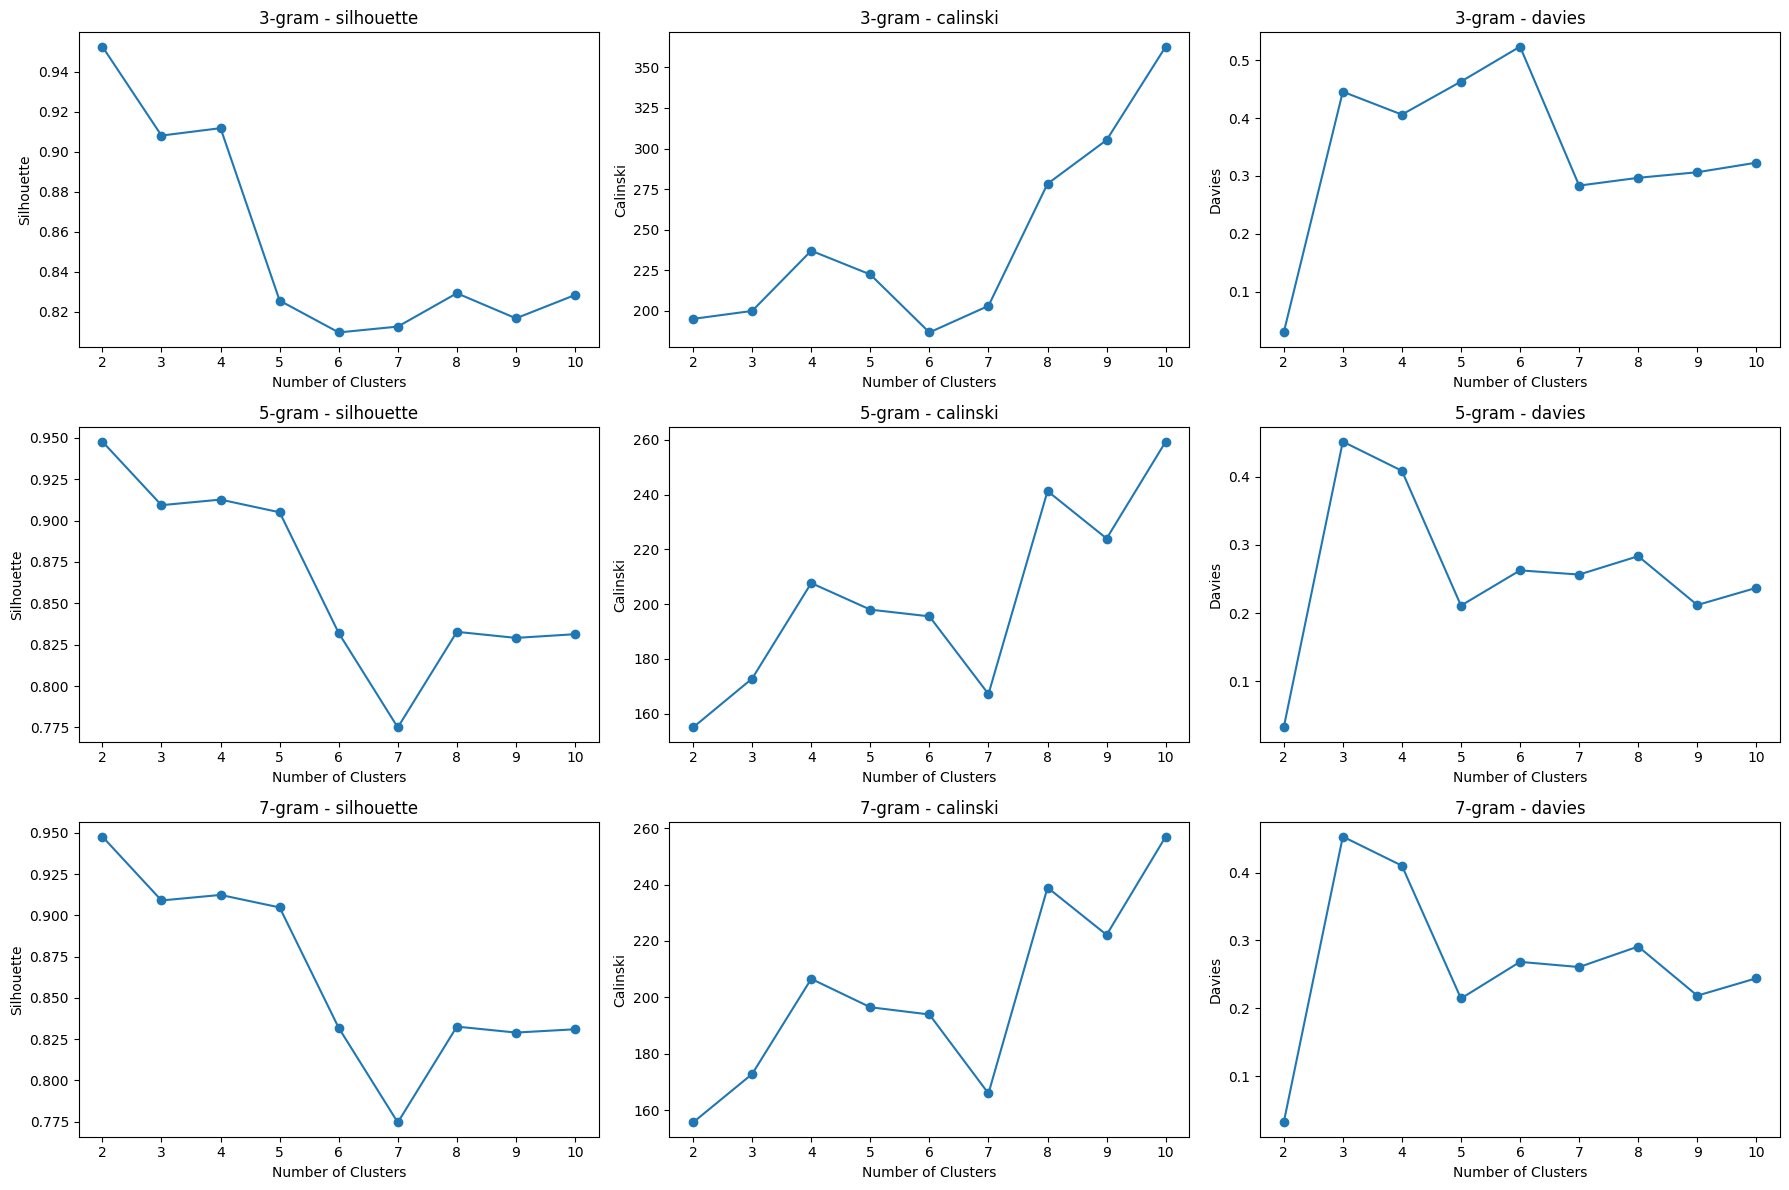

In [64]:
kmeans_clustering(datasets)

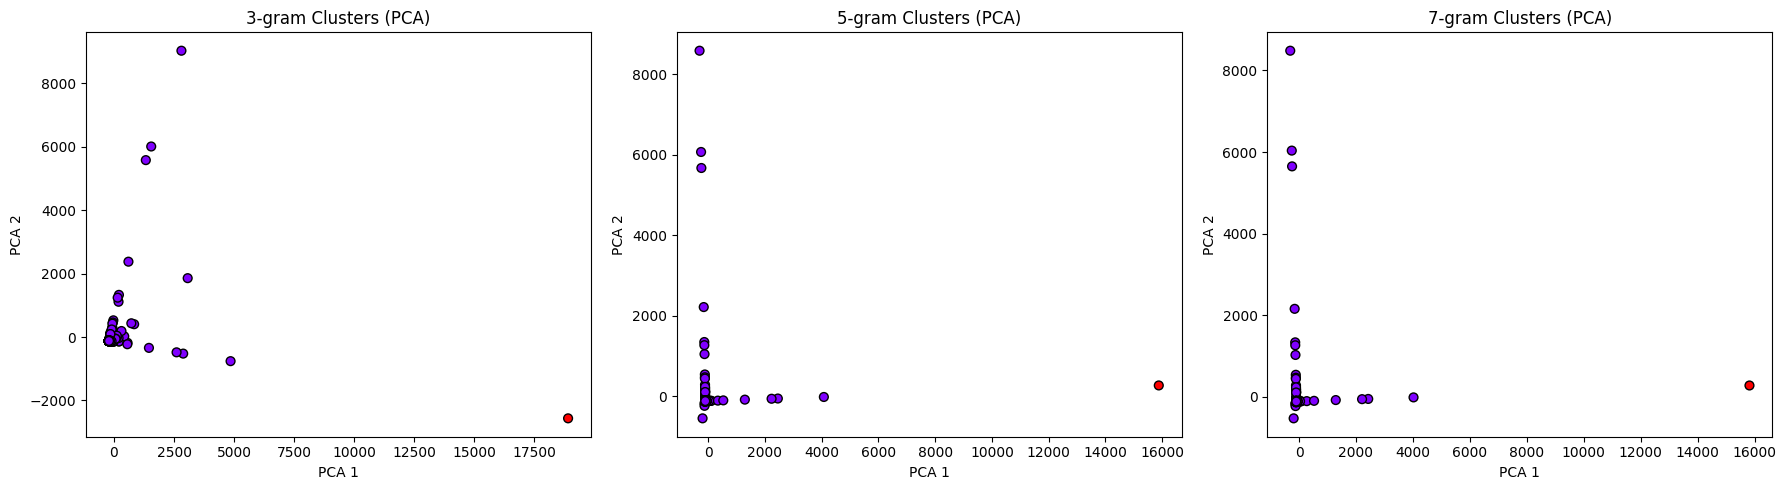

In [65]:
# Visualisation of clusterings
k = 2 # Because Silhouette and Davies are best with this number of clusters, even if Calinski increass
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, (label, data) in zip(axes, datasets.items()):
    # PCA to 2D
    pca = PCA(n_components=2, random_state=42)
    reduced_data = pca.fit_transform(data)

    # KMeans clustering
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    clusters = kmeans.fit_predict(data)

    # Scatter plot
    ax.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap="rainbow", s=40, edgecolor='k')
    ax.set_title(f"{label} Clusters (PCA)")
    ax.set_xlabel("PCA 1")
    ax.set_ylabel("PCA 2")

plt.tight_layout()
plt.show()

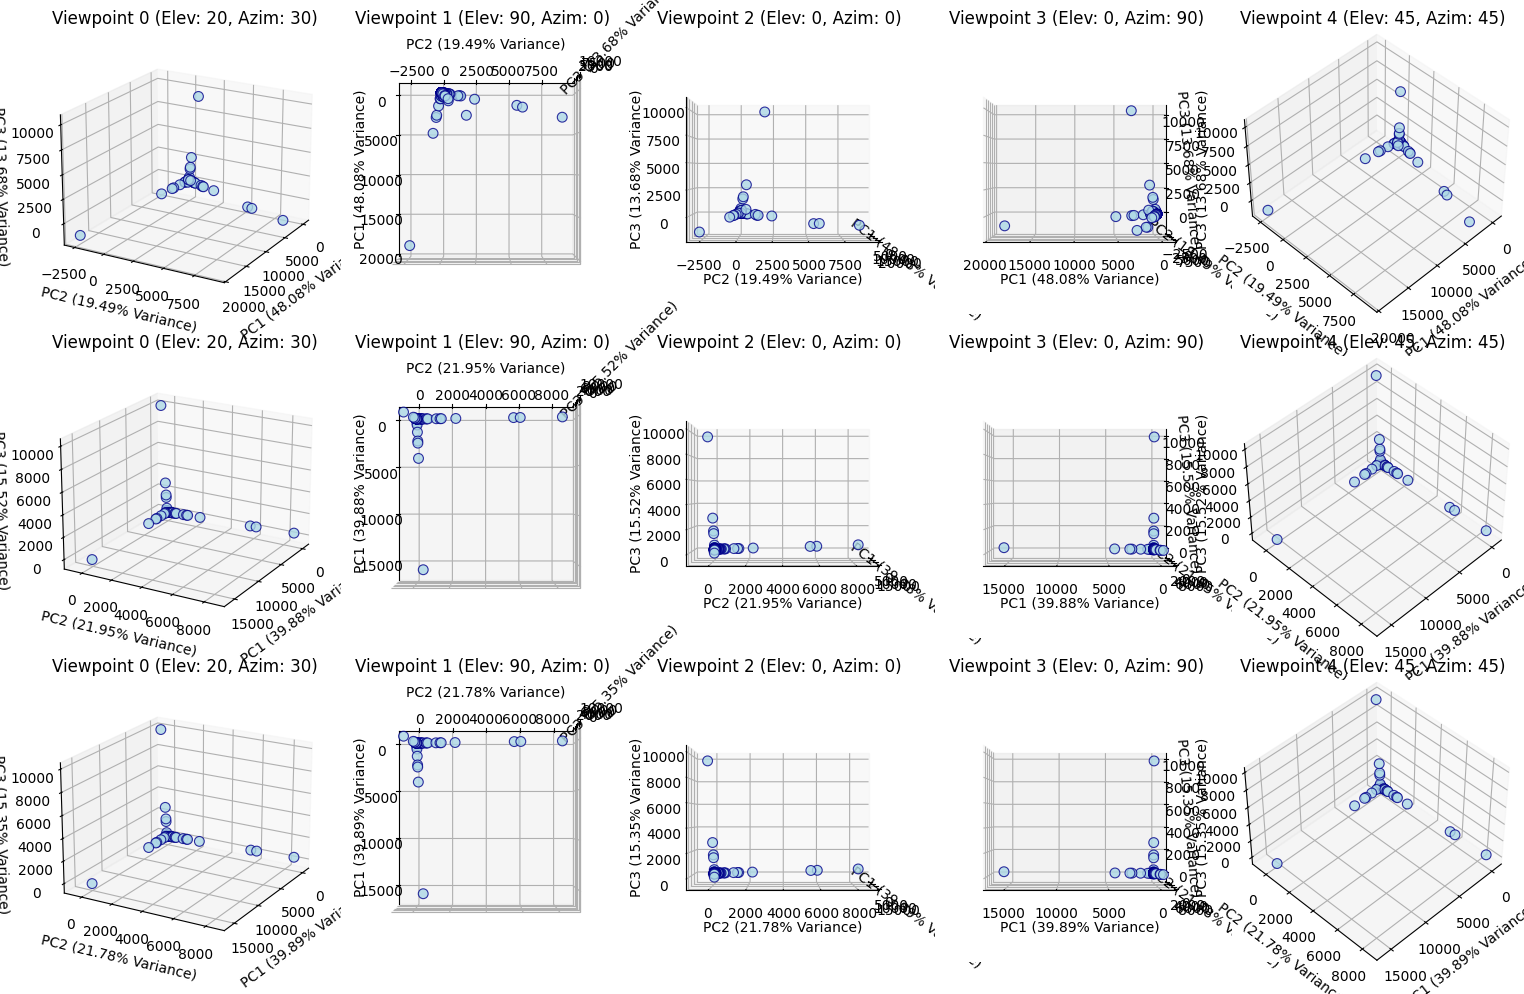

In [66]:
# Visualisation of clusterings
fig, axes = plt.subplots(nrows=3, ncols=5, subplot_kw={"projection": "3d"}, figsize=(15, 10))

for i, (label, data) in enumerate(datasets.items()):
    # PCA to 2D
    pca = PCA(n_components=3)  # Reduce to 3 components for 3D visualization
    principal_components = pca.fit_transform(data)
    explained_variance = pca.explained_variance_ratio_
    
    pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
    
    # Define viewpoints (elevation, azimuth)
    viewpoints = [
        (20, 30),   # Default view
        (90, 0),    # Top-down view
        (0, 0),     # Front view
        (0, 90),    # Side view
        (45, 45)    # Isometric view
    ]
    
    for j, (elev, azim) in enumerate(viewpoints):
        ax = axes[i][j]
        
        # Scatter plot
        if 'Label' in pca_df:
            categories = pca_df['Label'].astype('category').cat.codes
            scatter = ax.scatter(
                pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], 
                c='lightblue',  # Inside color
                edgecolors='darkblue',  # Border color
                linewidth=0.8,  # Border thickness
                alpha=0.8,  # Transparency
                s=50  # Size of the points
            )
            if j == 1:  # Add legend only to the first subplot
                legend = ax.legend(*scatter.legend_elements(), title="Label")
                ax.add_artist(legend)
        else:
            ax.scatter(
                pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], 
                c='lightblue', edgecolors='darkblue', linewidth=0.8, alpha=0.8, s=50
            )
        
        # Set view angles
        ax.view_init(elev=elev, azim=azim)
        
        # Customize axes
        ax.set_title(f'Viewpoint {j} (Elev: {elev}, Azim: {azim})')
        ax.set_xlabel(f'PC1 ({explained_variance[0]*100:.2f}% Variance)')
        ax.set_ylabel(f'PC2 ({explained_variance[1]*100:.2f}% Variance)')
        ax.set_zlabel(f'PC3 ({explained_variance[2]*100:.2f}% Variance)')
    
plt.tight_layout()
plt.show()

### Marburg Virus

In [67]:
df3 = pd.read_csv("../csv_data/3gram_matrix_amino_acid_marburg.csv").drop(columns=["virus_type", "protein_type"])
df5 = pd.read_csv("../csv_data/5gram_matrix_amino_acid_marburg.csv").drop(columns=["virus_type", "protein_type"])
df7 = pd.read_csv("../csv_data/7gram_matrix_amino_acid_marburg.csv").drop(columns=["virus_type", "protein_type"])
datasets = {"3-gram": df3, "5-gram": df5, "7-gram": df7}

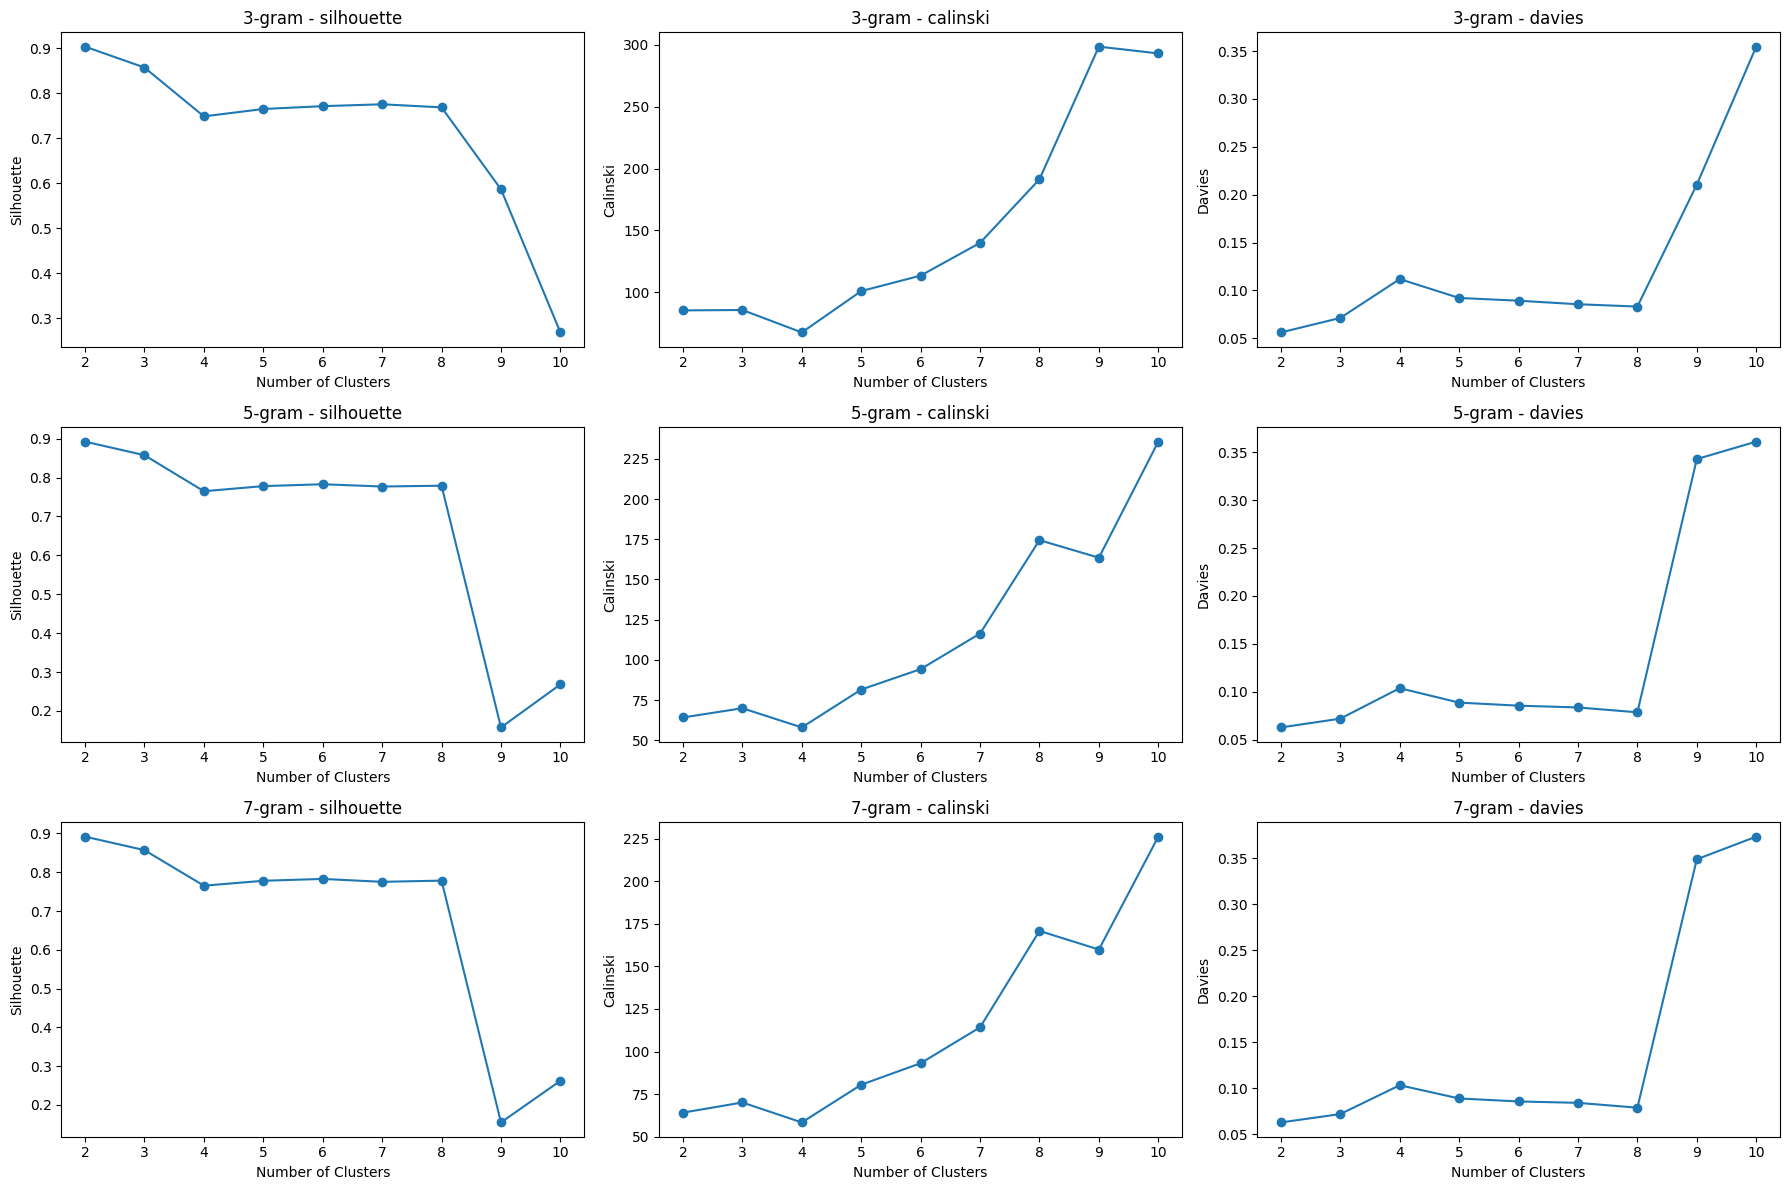

In [68]:
kmeans_clustering(datasets)

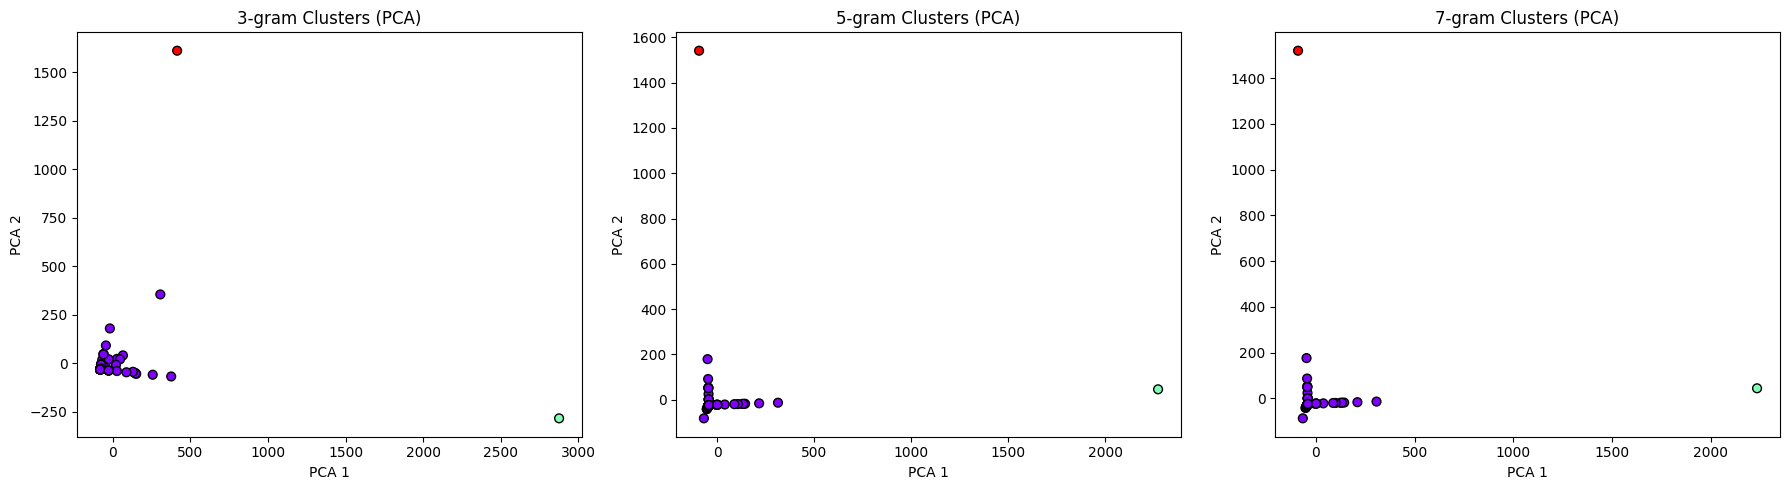

In [69]:
# Visualisation of clusterings
k = 3
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, (label, data) in zip(axes, datasets.items()):
    # PCA to 2D
    pca = PCA(n_components=2, random_state=42)
    reduced_data = pca.fit_transform(data)

    # KMeans clustering
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    clusters = kmeans.fit_predict(data)

    # Scatter plot
    ax.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap="rainbow", s=40, edgecolor='k')
    ax.set_title(f"{label} Clusters (PCA)")
    ax.set_xlabel("PCA 1")
    ax.set_ylabel("PCA 2")

plt.tight_layout()
plt.show()

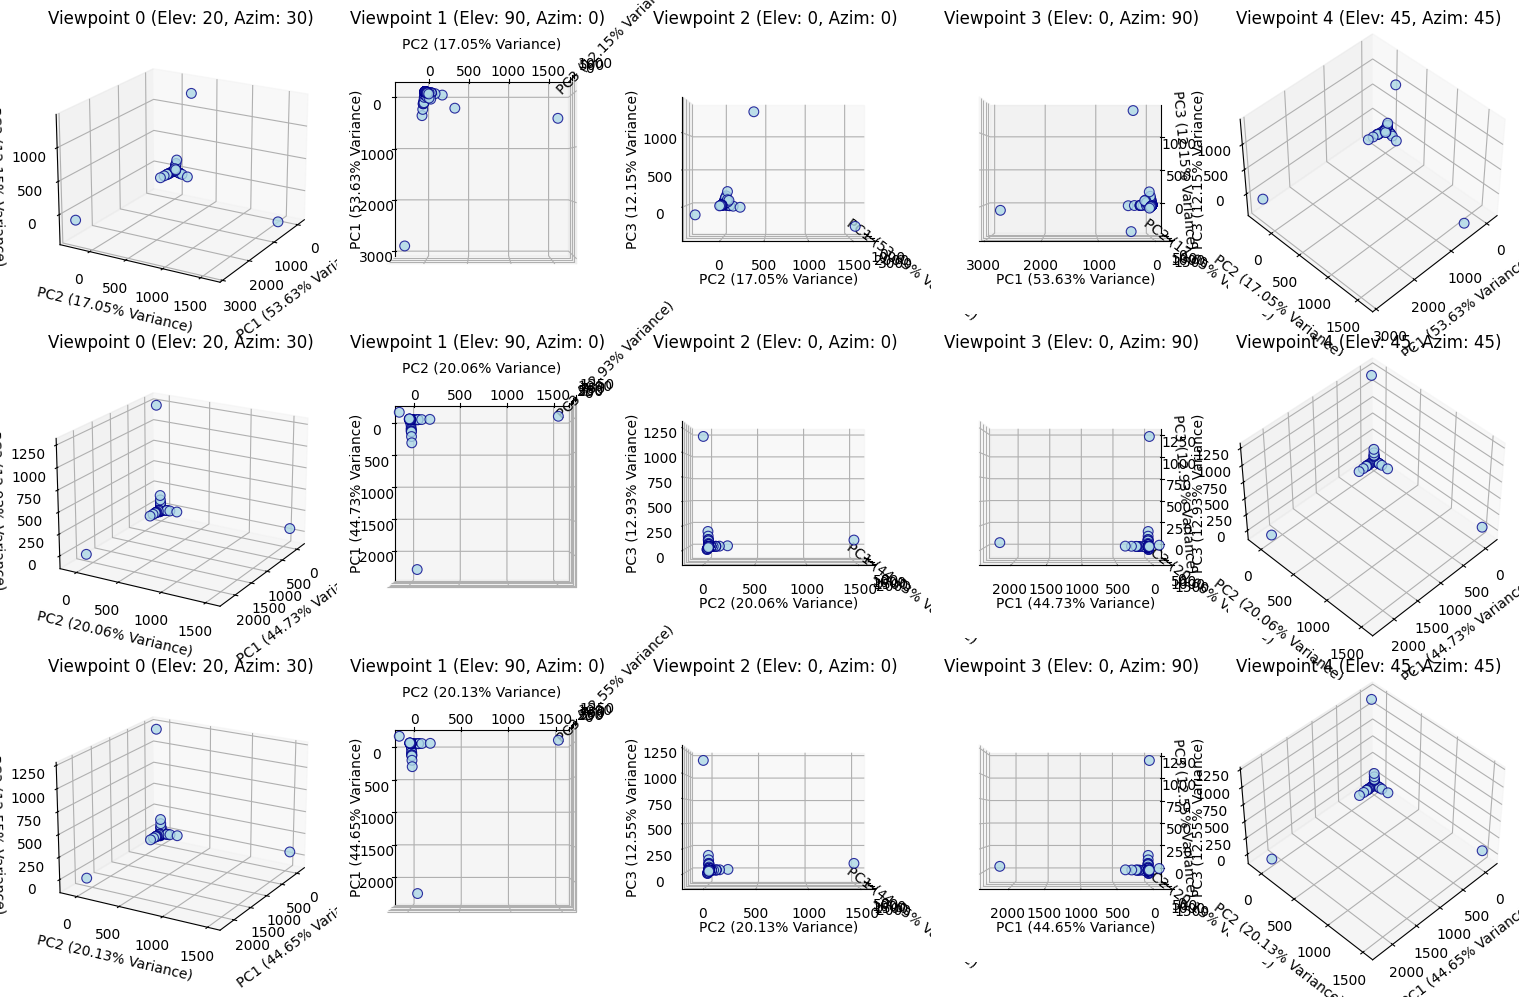

In [70]:
# Visualisation of clusterings
fig, axes = plt.subplots(nrows=3, ncols=5, subplot_kw={"projection": "3d"}, figsize=(15, 10))

for i, (label, data) in enumerate(datasets.items()):
    # PCA to 2D
    pca = PCA(n_components=3)  # Reduce to 3 components for 3D visualization
    principal_components = pca.fit_transform(data)
    explained_variance = pca.explained_variance_ratio_
    
    pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
    
    # Define viewpoints (elevation, azimuth)
    viewpoints = [
        (20, 30),   # Default view
        (90, 0),    # Top-down view
        (0, 0),     # Front view
        (0, 90),    # Side view
        (45, 45)    # Isometric view
    ]
    
    for j, (elev, azim) in enumerate(viewpoints):
        ax = axes[i][j]
        
        # Scatter plot
        if 'Label' in pca_df:
            categories = pca_df['Label'].astype('category').cat.codes
            scatter = ax.scatter(
                pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], 
                c='lightblue',  # Inside color
                edgecolors='darkblue',  # Border color
                linewidth=0.8,  # Border thickness
                alpha=0.8,  # Transparency
                s=50  # Size of the points
            )
            if j == 1:  # Add legend only to the first subplot
                legend = ax.legend(*scatter.legend_elements(), title="Label")
                ax.add_artist(legend)
        else:
            ax.scatter(
                pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], 
                c='lightblue', edgecolors='darkblue', linewidth=0.8, alpha=0.8, s=50
            )
        
        # Set view angles
        ax.view_init(elev=elev, azim=azim)
        
        # Customize axes
        ax.set_title(f'Viewpoint {j} (Elev: {elev}, Azim: {azim})')
        ax.set_xlabel(f'PC1 ({explained_variance[0]*100:.2f}% Variance)')
        ax.set_ylabel(f'PC2 ({explained_variance[1]*100:.2f}% Variance)')
        ax.set_zlabel(f'PC3 ({explained_variance[2]*100:.2f}% Variance)')
    
plt.tight_layout()
plt.show()

### Mers Virus

In [71]:
df3 = pd.read_csv("../csv_data/3gram_matrix_amino_acid_mers.csv").drop(columns=["virus_type", "protein_type"])
df5 = pd.read_csv("../csv_data/5gram_matrix_amino_acid_mers.csv").drop(columns=["virus_type", "protein_type"])
df7 = pd.read_csv("../csv_data/7gram_matrix_amino_acid_mers.csv").drop(columns=["virus_type", "protein_type"])
datasets = {"3-gram": df3, "5-gram": df5, "7-gram": df7}

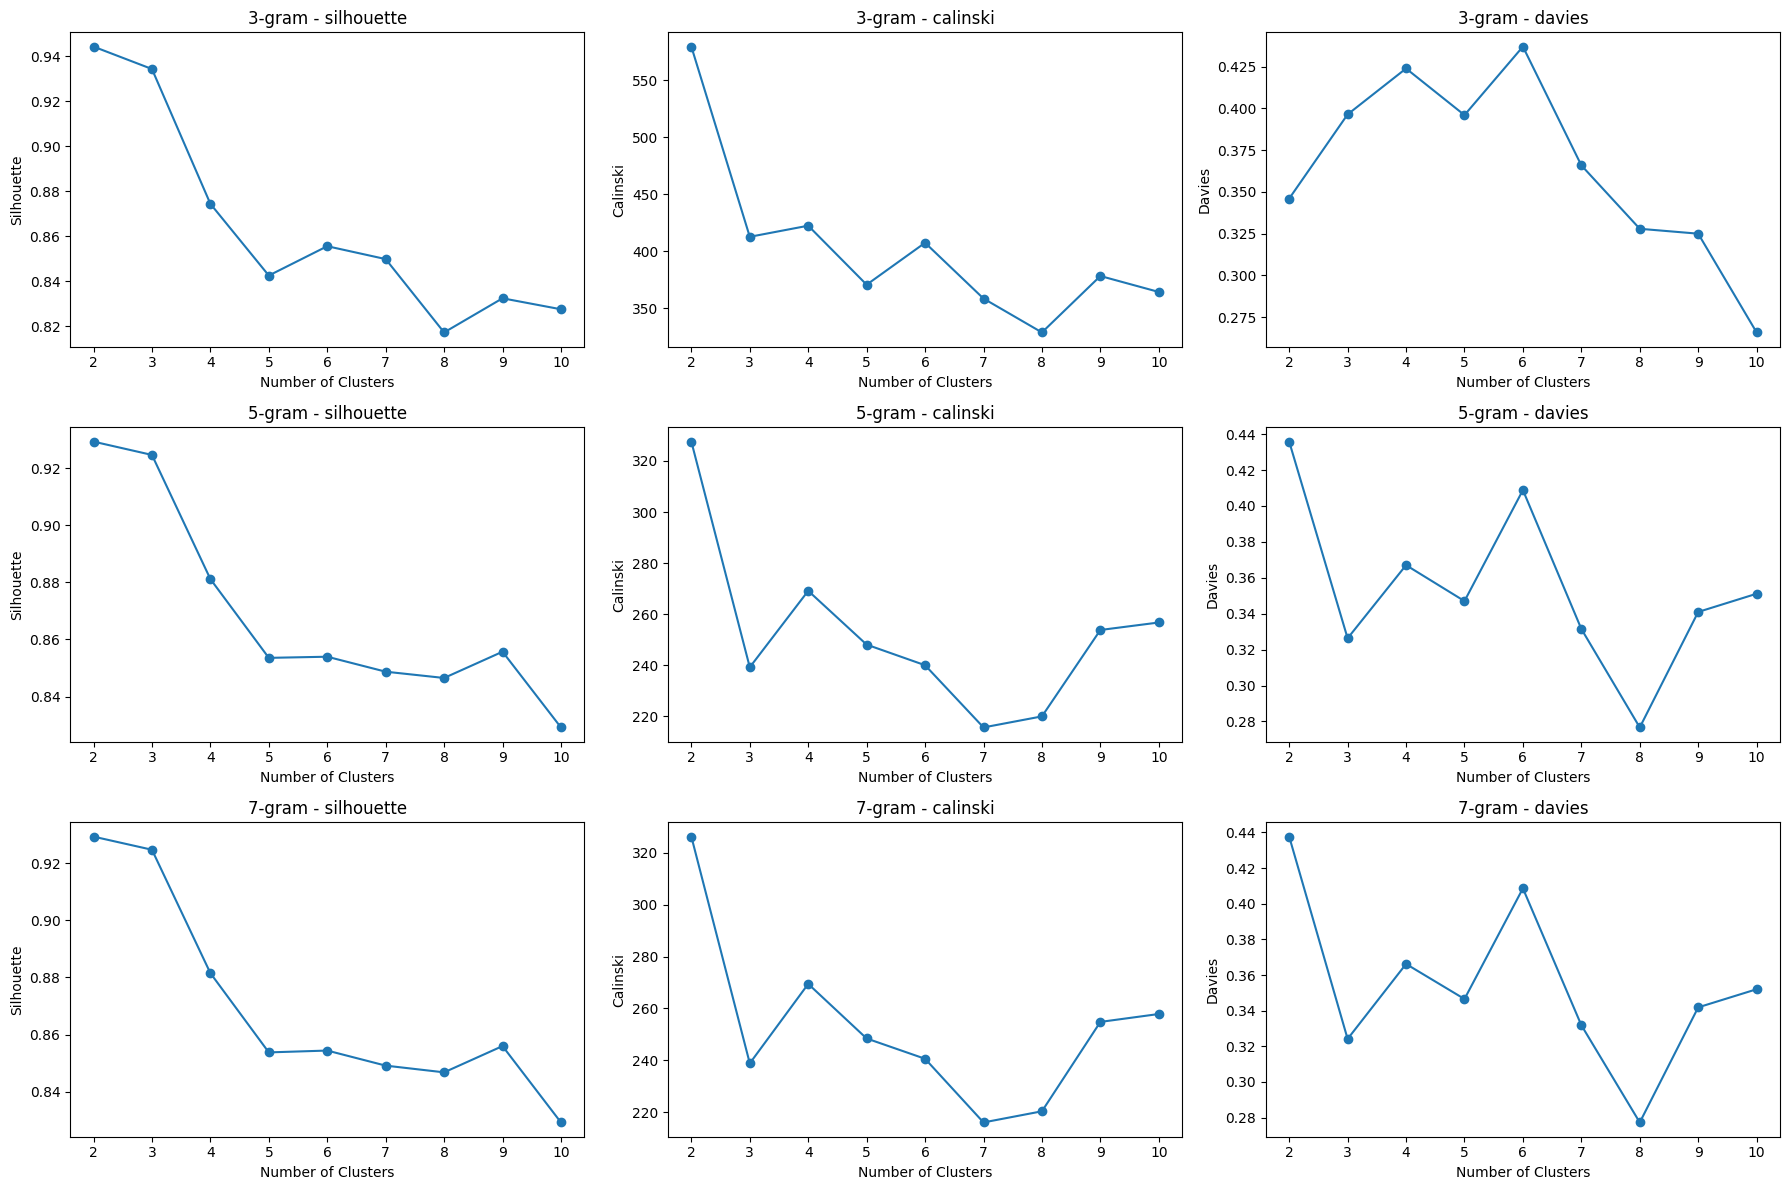

In [72]:
kmeans_clustering(datasets)

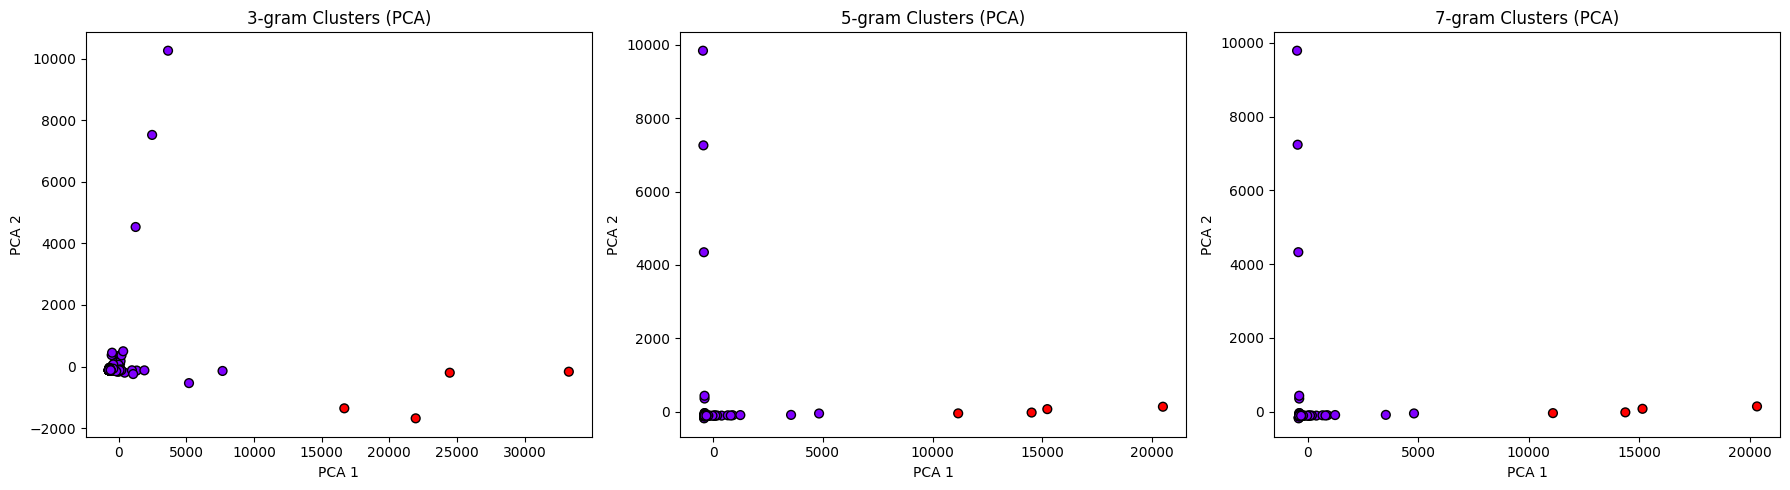

In [73]:
# Visualisation of clusterings
k = 2 #k = 8
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, (label, data) in zip(axes, datasets.items()):
    # PCA to 2D
    pca = PCA(n_components=2, random_state=42)
    reduced_data = pca.fit_transform(data)

    # KMeans clustering
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    clusters = kmeans.fit_predict(data)

    # Scatter plot
    ax.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap="rainbow", s=40, edgecolor='k')
    ax.set_title(f"{label} Clusters (PCA)")
    ax.set_xlabel("PCA 1")
    ax.set_ylabel("PCA 2")

plt.tight_layout()
plt.show()

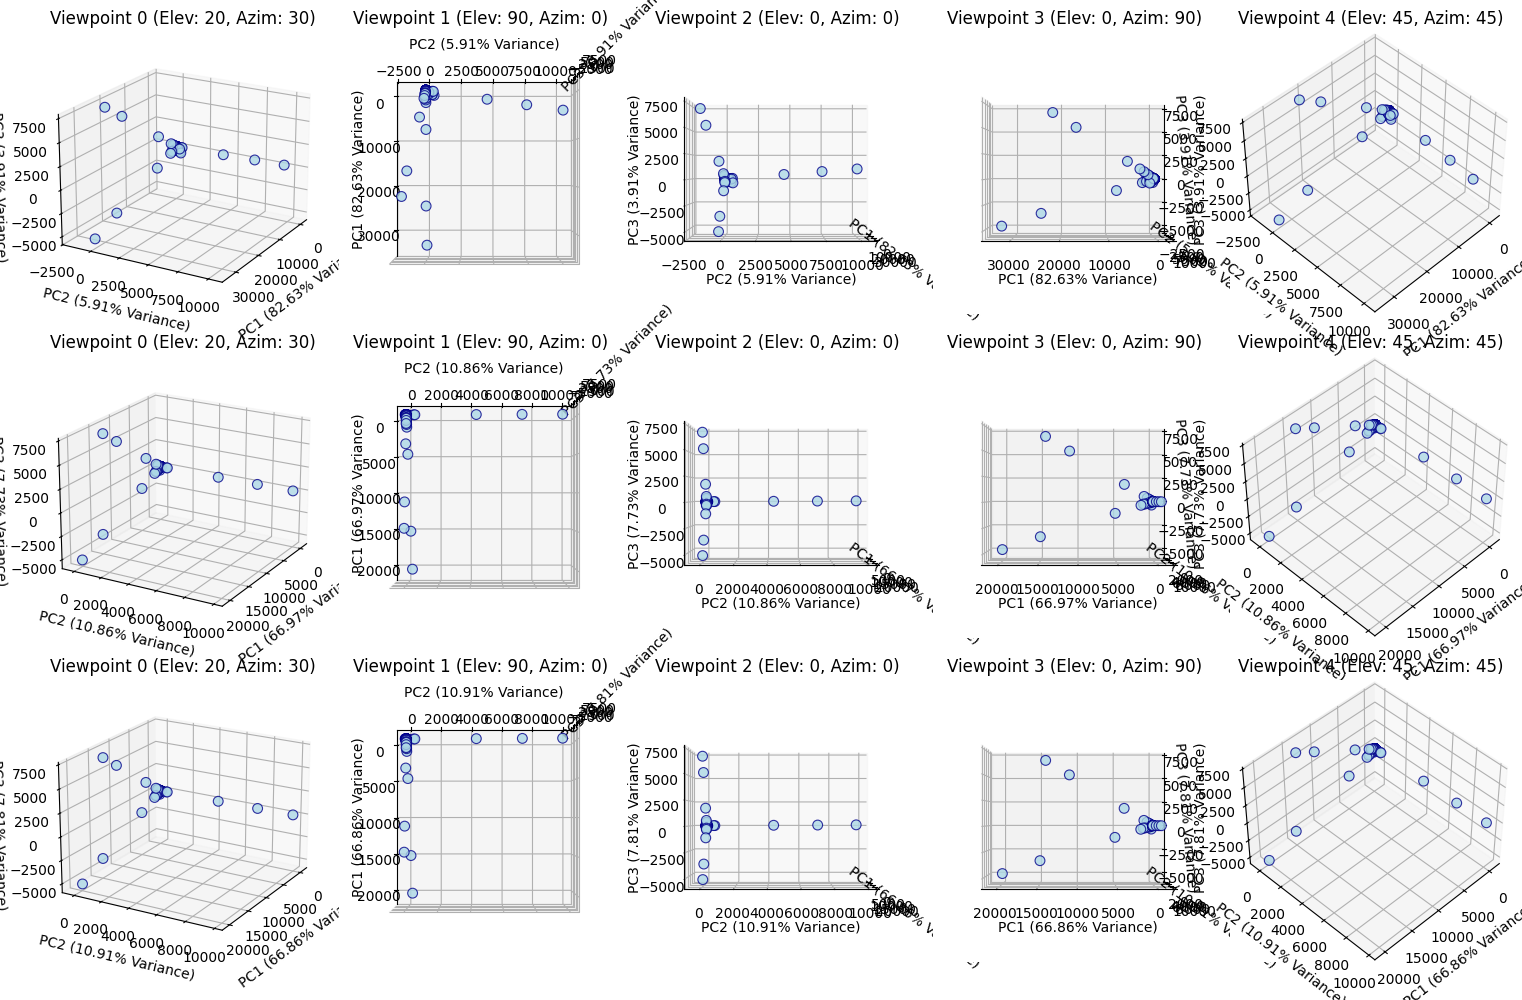

In [74]:
# Visualisation of clusterings
fig, axes = plt.subplots(nrows=3, ncols=5, subplot_kw={"projection": "3d"}, figsize=(15, 10))

for i, (label, data) in enumerate(datasets.items()):
    # PCA to 2D
    pca = PCA(n_components=3)  # Reduce to 3 components for 3D visualization
    principal_components = pca.fit_transform(data)
    explained_variance = pca.explained_variance_ratio_
    
    pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
    
    # Define viewpoints (elevation, azimuth)
    viewpoints = [
        (20, 30),   # Default view
        (90, 0),    # Top-down view
        (0, 0),     # Front view
        (0, 90),    # Side view
        (45, 45)    # Isometric view
    ]
    
    for j, (elev, azim) in enumerate(viewpoints):
        ax = axes[i][j]
        
        # Scatter plot
        if 'Label' in pca_df:
            categories = pca_df['Label'].astype('category').cat.codes
            scatter = ax.scatter(
                pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], 
                c='lightblue',  # Inside color
                edgecolors='darkblue',  # Border color
                linewidth=0.8,  # Border thickness
                alpha=0.8,  # Transparency
                s=50  # Size of the points
            )
            if j == 1:  # Add legend only to the first subplot
                legend = ax.legend(*scatter.legend_elements(), title="Label")
                ax.add_artist(legend)
        else:
            ax.scatter(
                pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], 
                c='lightblue', edgecolors='darkblue', linewidth=0.8, alpha=0.8, s=50
            )
        
        # Set view angles
        ax.view_init(elev=elev, azim=azim)
        
        # Customize axes
        ax.set_title(f'Viewpoint {j} (Elev: {elev}, Azim: {azim})')
        ax.set_xlabel(f'PC1 ({explained_variance[0]*100:.2f}% Variance)')
        ax.set_ylabel(f'PC2 ({explained_variance[1]*100:.2f}% Variance)')
        ax.set_zlabel(f'PC3 ({explained_variance[2]*100:.2f}% Variance)')
    
plt.tight_layout()
plt.show()

#  Hierarchical Clustering

In [75]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

In [76]:
def hierarchical_clustering(datasets):
    cluster_range = range(2, 11)
    results = {ngram: {"clusters": [], "silhouette": [], "calinski": [], "davies": []} for ngram in datasets}
    
    # Grid search
    for ngram, data in datasets.items():
        for k in cluster_range:
            model = AgglomerativeClustering(n_clusters=k)
            labels = model.fit_predict(data)
            results[ngram]["clusters"].append(k)
            results[ngram]["silhouette"].append(silhouette_score(data, labels))
            results[ngram]["calinski"].append(calinski_harabasz_score(data, labels))
            results[ngram]["davies"].append(davies_bouldin_score(data, labels))
    
    # Plot metric scores for each n-gram
    fig, axes = plt.subplots(3, 3, figsize=(18, 12))
    metrics = ["silhouette", "calinski", "davies"]
    
    for i, (ngram, scores) in enumerate(results.items()):
        for j, metric in enumerate(metrics):
            ax = axes[i, j]
            ax.plot(scores["clusters"], scores[metric], marker='o')
            ax.set_title(f"{ngram} - {metric}")
            ax.set_xlabel("Number of Clusters")
            ax.set_ylabel(metric.capitalize())
    
    plt.tight_layout()
    plt.show()

### Ebola Virus

In [77]:
df3 = pd.read_csv("../csv_data/3gram_matrix_amino_acid_ebola.csv").drop(columns=["virus_type", "protein_type"])
df5 = pd.read_csv("../csv_data/5gram_matrix_amino_acid_ebola.csv").drop(columns=["virus_type", "protein_type"])
df7 = pd.read_csv("../csv_data/7gram_matrix_amino_acid_ebola.csv").drop(columns=["virus_type", "protein_type"])
datasets = {"3-gram": df3, "5-gram": df5, "7-gram": df7}

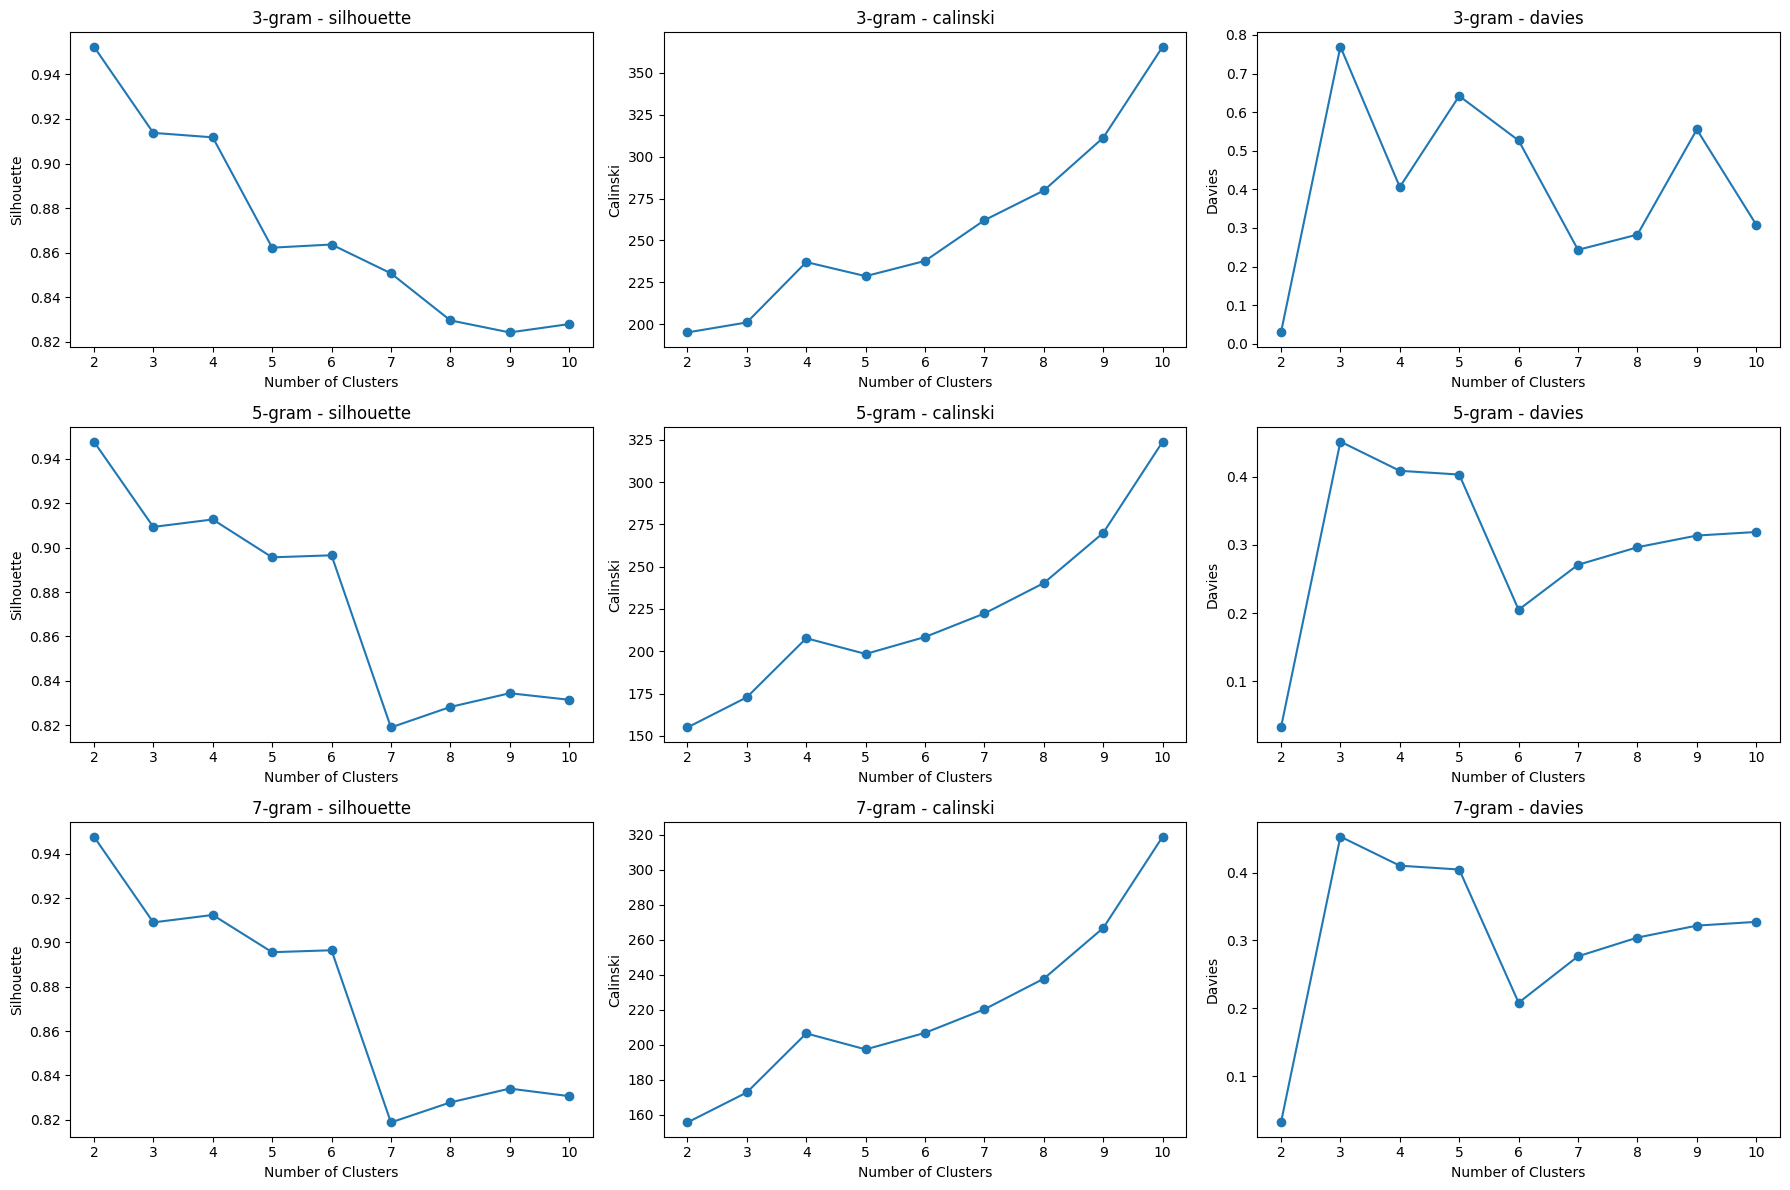

In [78]:
hierarchical_clustering(datasets)

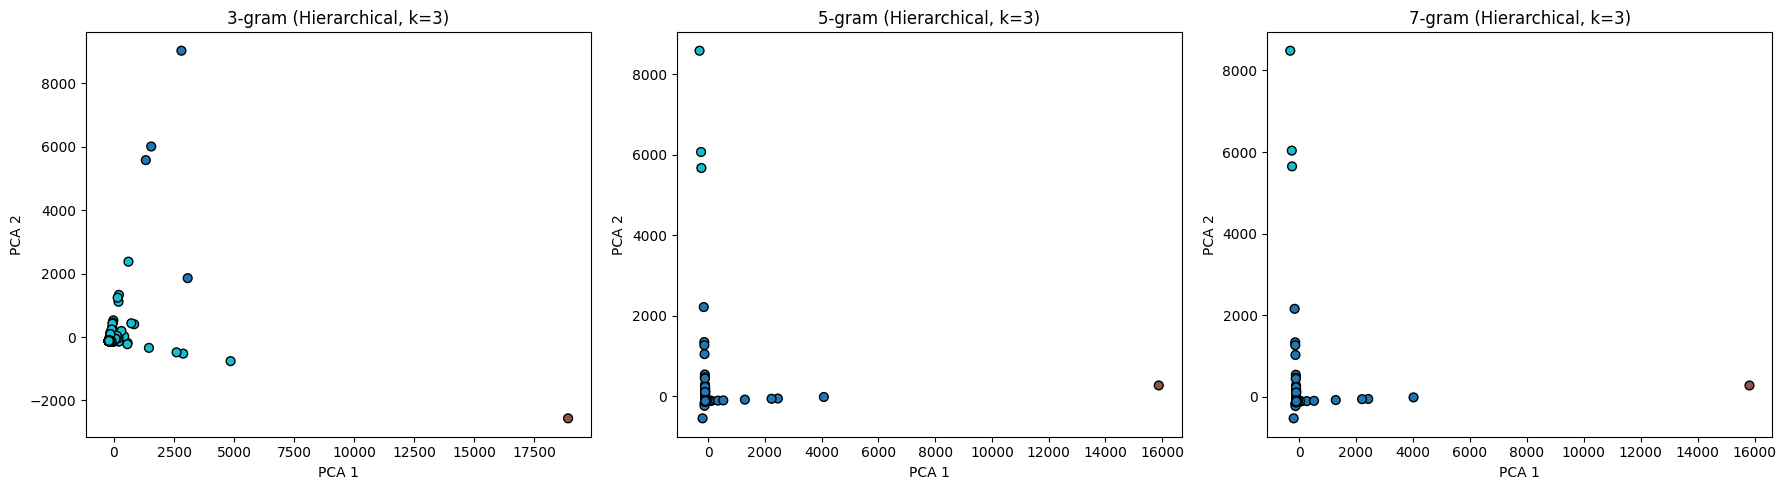

In [79]:
# PCA visualization
k = 3
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (ngram, data) in zip(axes, datasets.items()):
    pca = PCA(n_components=2, random_state=42)
    reduced = pca.fit_transform(data)
    
    model = AgglomerativeClustering(n_clusters=k)
    clusters = model.fit_predict(data)
    
    ax.scatter(reduced[:, 0], reduced[:, 1], c=clusters, cmap='tab10', s=40, edgecolor='k')
    ax.set_title(f"{ngram} (Hierarchical, k={k})")
    ax.set_xlabel("PCA 1")
    ax.set_ylabel("PCA 2")

plt.tight_layout()
plt.show()


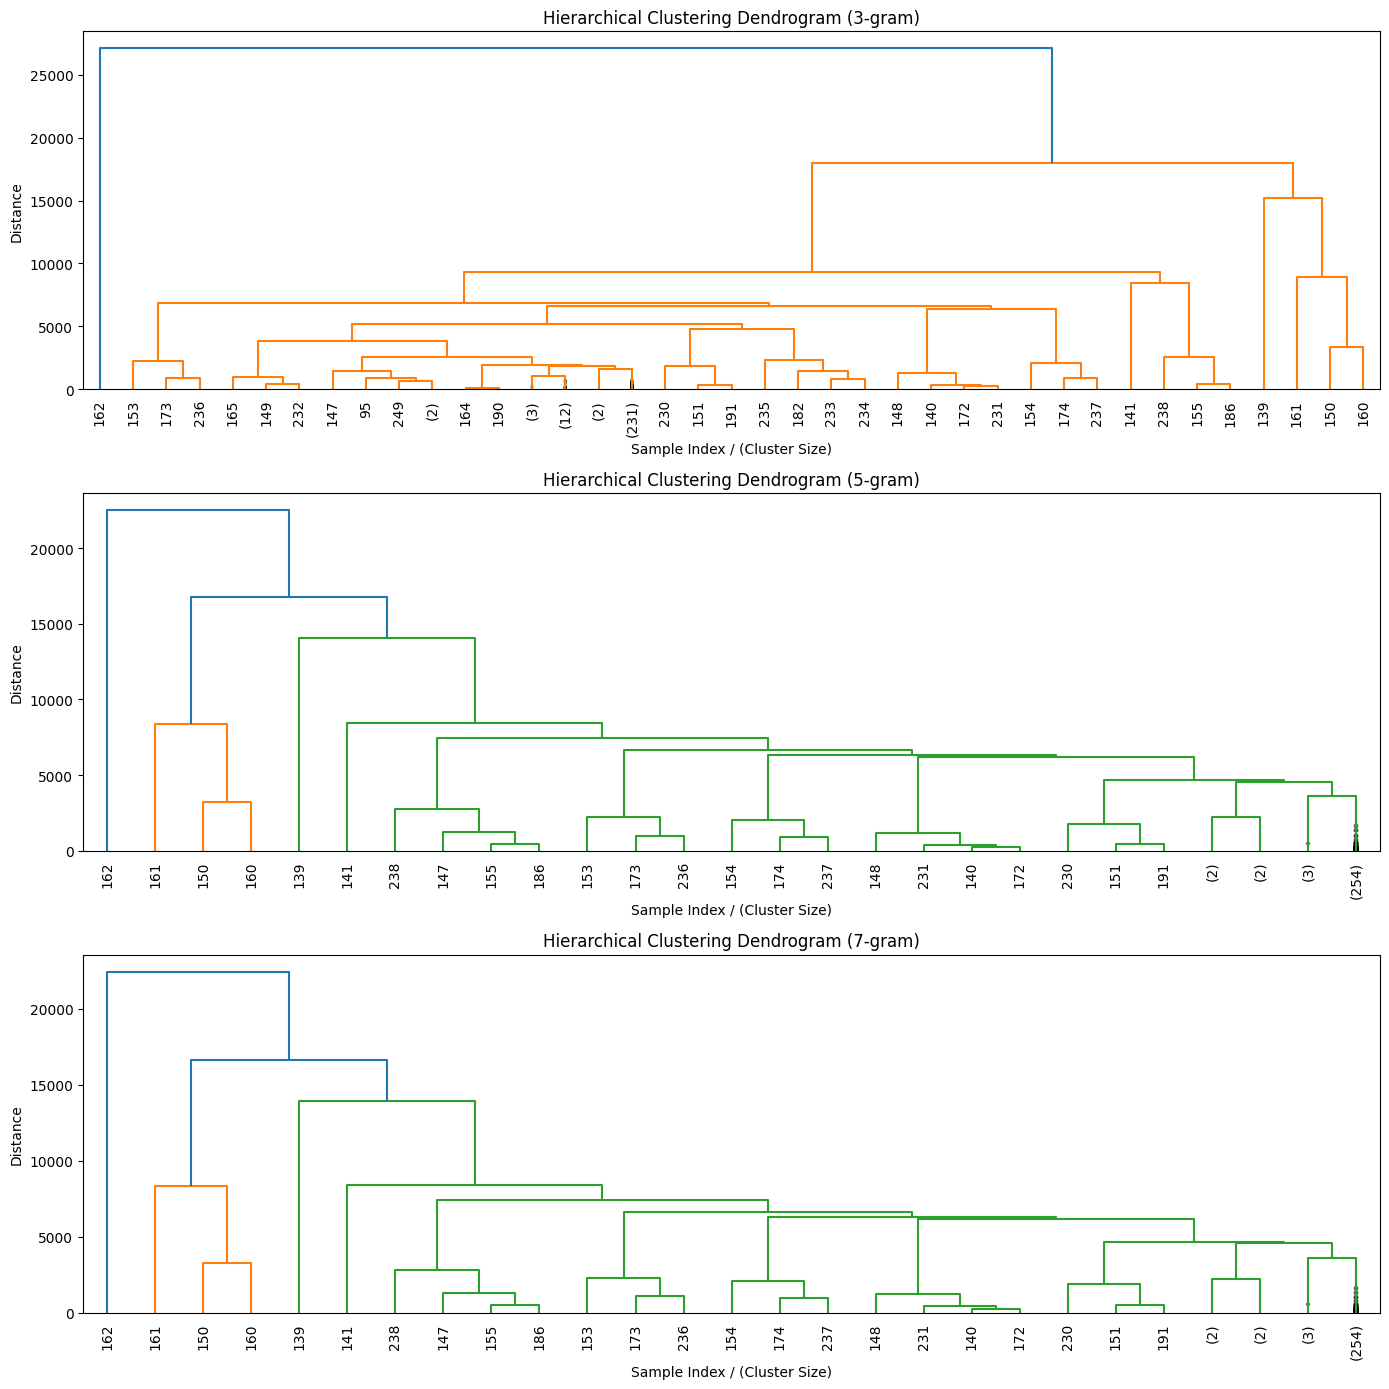

In [80]:
# Plot dendrograms
fig, axes = plt.subplots(3, 1, figsize=(14, 14))

for ax, (label, data) in zip(axes, datasets.items()):
    linked = linkage(data, method='ward')
    
    dendrogram(linked,
               truncate_mode='level',
               p=10,
               ax=ax,
               leaf_rotation=90.,
               leaf_font_size=10.,
               show_contracted=True)
    
    ax.set_title(f"Hierarchical Clustering Dendrogram ({label})")
    ax.set_xlabel("Sample Index / (Cluster Size)")
    ax.set_ylabel("Distance")

plt.tight_layout()
plt.show()

### Marburg Virus

In [81]:
df3 = pd.read_csv("../csv_data/3gram_matrix_amino_acid_marburg.csv").drop(columns=["virus_type", "protein_type"])
df5 = pd.read_csv("../csv_data/5gram_matrix_amino_acid_marburg.csv").drop(columns=["virus_type", "protein_type"])
df7 = pd.read_csv("../csv_data/7gram_matrix_amino_acid_marburg.csv").drop(columns=["virus_type", "protein_type"])
datasets = {"3-gram": df3, "5-gram": df5, "7-gram": df7}

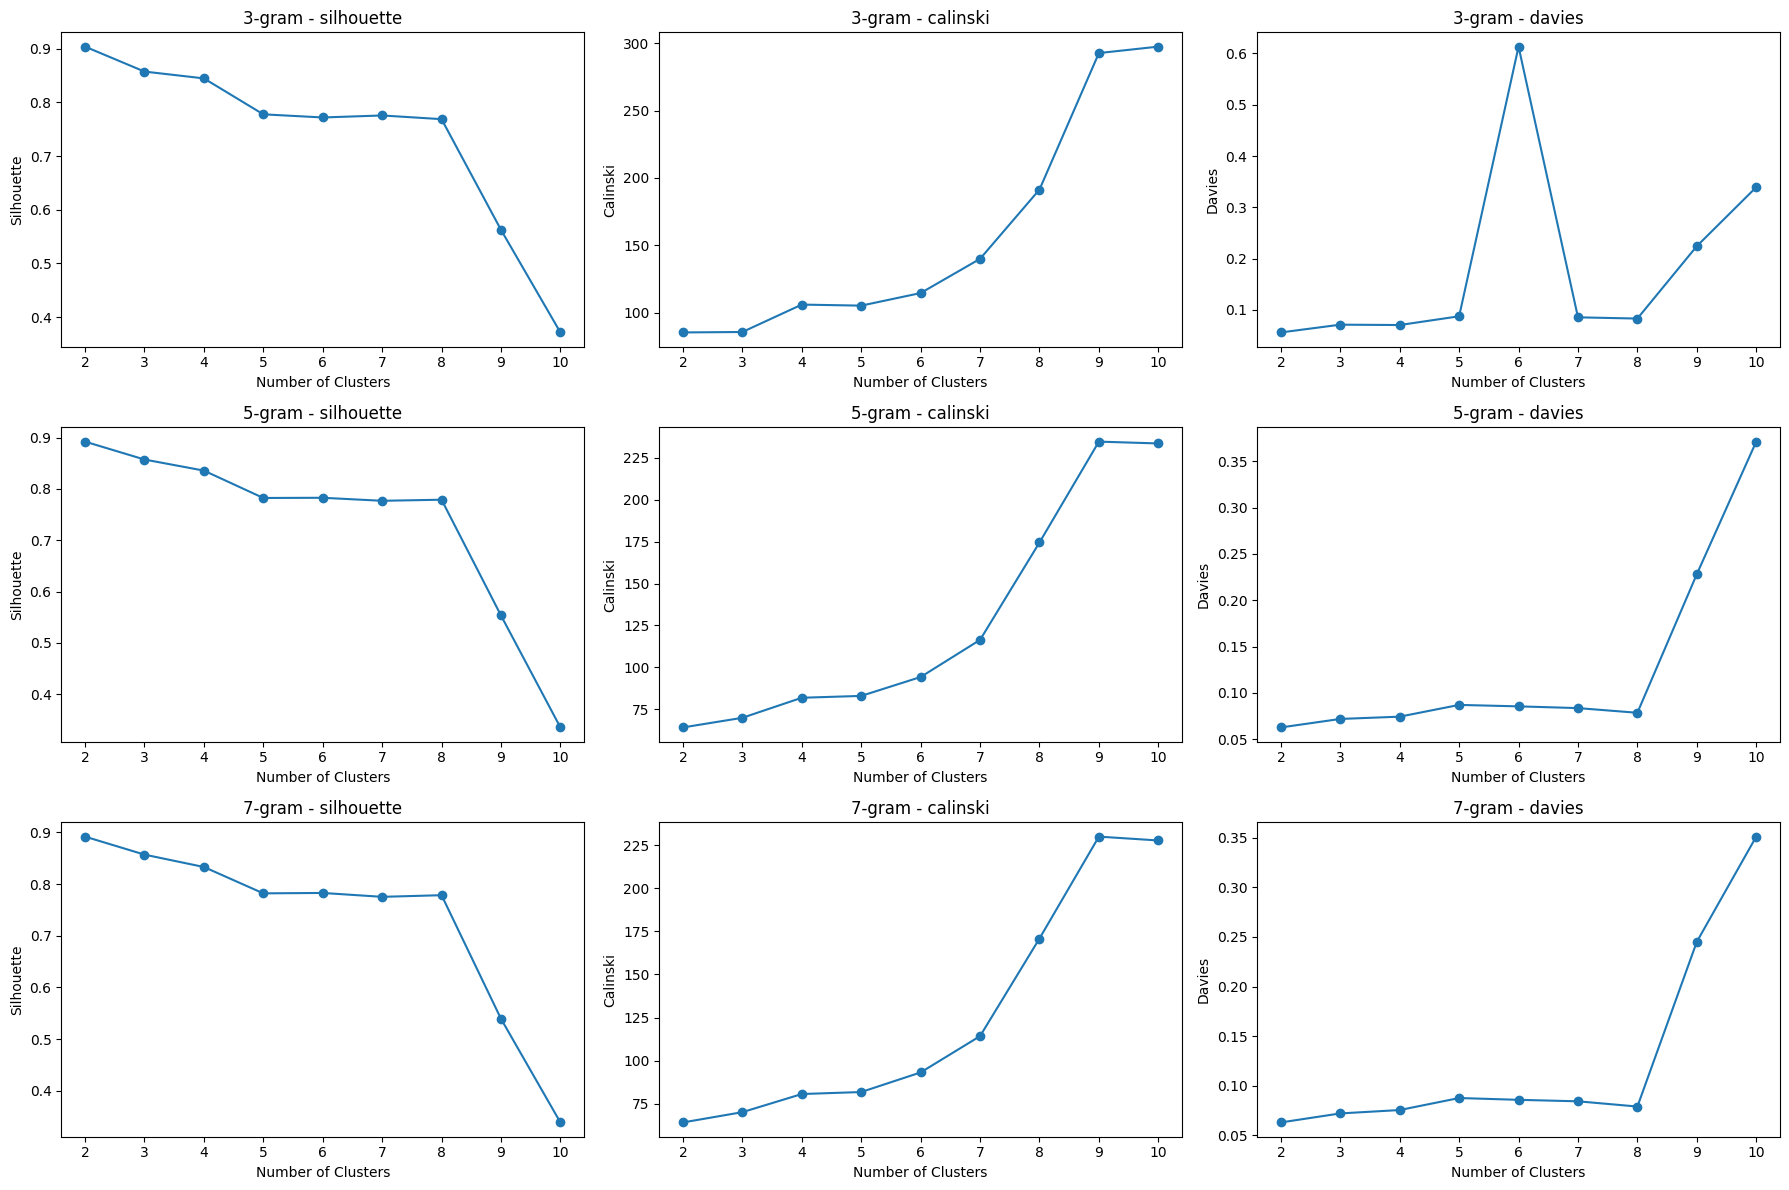

In [82]:
hierarchical_clustering(datasets)

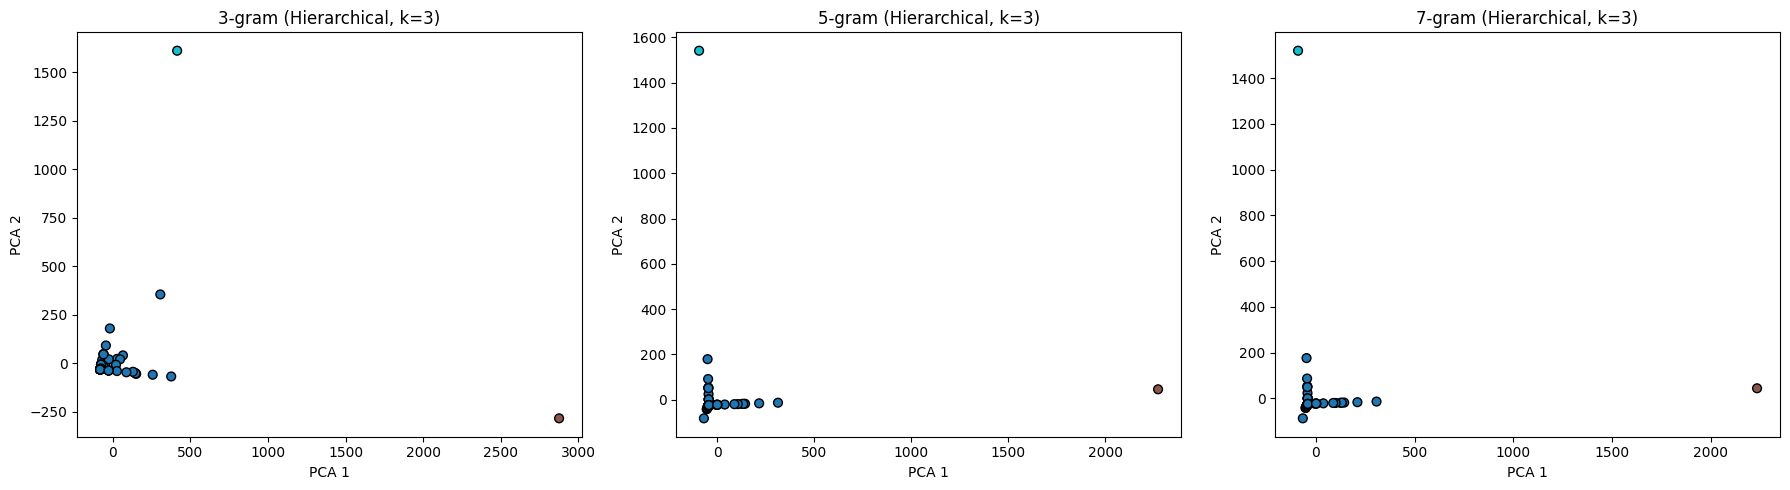

In [83]:
# PCA visualization
k = 3
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (ngram, data) in zip(axes, datasets.items()):
    pca = PCA(n_components=2, random_state=42)
    reduced = pca.fit_transform(data)
    
    model = AgglomerativeClustering(n_clusters=k)
    clusters = model.fit_predict(data)
    
    ax.scatter(reduced[:, 0], reduced[:, 1], c=clusters, cmap='tab10', s=40, edgecolor='k')
    ax.set_title(f"{ngram} (Hierarchical, k={k})")
    ax.set_xlabel("PCA 1")
    ax.set_ylabel("PCA 2")

plt.tight_layout()
plt.show()


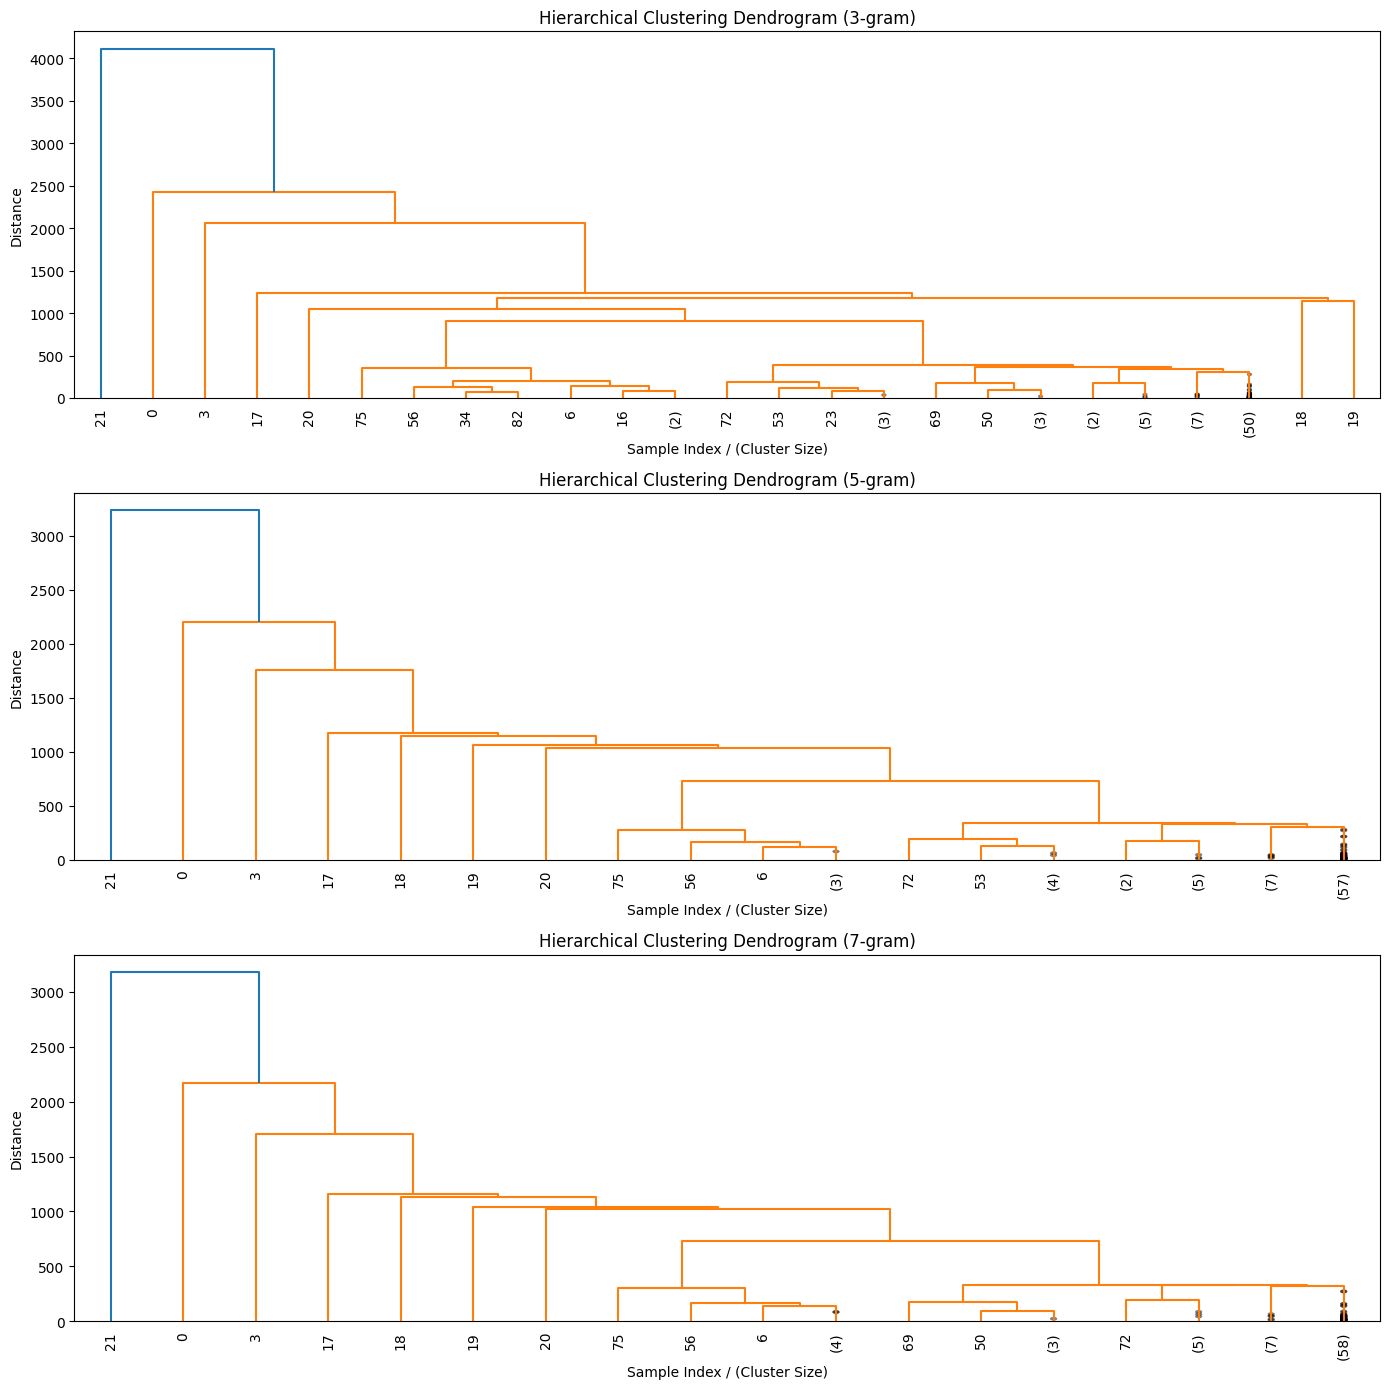

In [84]:
# Plot dendrograms
fig, axes = plt.subplots(3, 1, figsize=(14, 14))

for ax, (label, data) in zip(axes, datasets.items()):
    linked = linkage(data, method='ward')
    
    dendrogram(linked,
               truncate_mode='level',
               p=10,
               ax=ax,
               leaf_rotation=90.,
               leaf_font_size=10.,
               show_contracted=True)
    
    ax.set_title(f"Hierarchical Clustering Dendrogram ({label})")
    ax.set_xlabel("Sample Index / (Cluster Size)")
    ax.set_ylabel("Distance")

plt.tight_layout()
plt.show()

### Mers Virus

In [85]:
df3 = pd.read_csv("../csv_data/3gram_matrix_amino_acid_mers.csv").drop(columns=["virus_type", "protein_type"])
df5 = pd.read_csv("../csv_data/5gram_matrix_amino_acid_mers.csv").drop(columns=["virus_type", "protein_type"])
df7 = pd.read_csv("../csv_data/7gram_matrix_amino_acid_mers.csv").drop(columns=["virus_type", "protein_type"])
datasets = {"3-gram": df3, "5-gram": df5, "7-gram": df7}

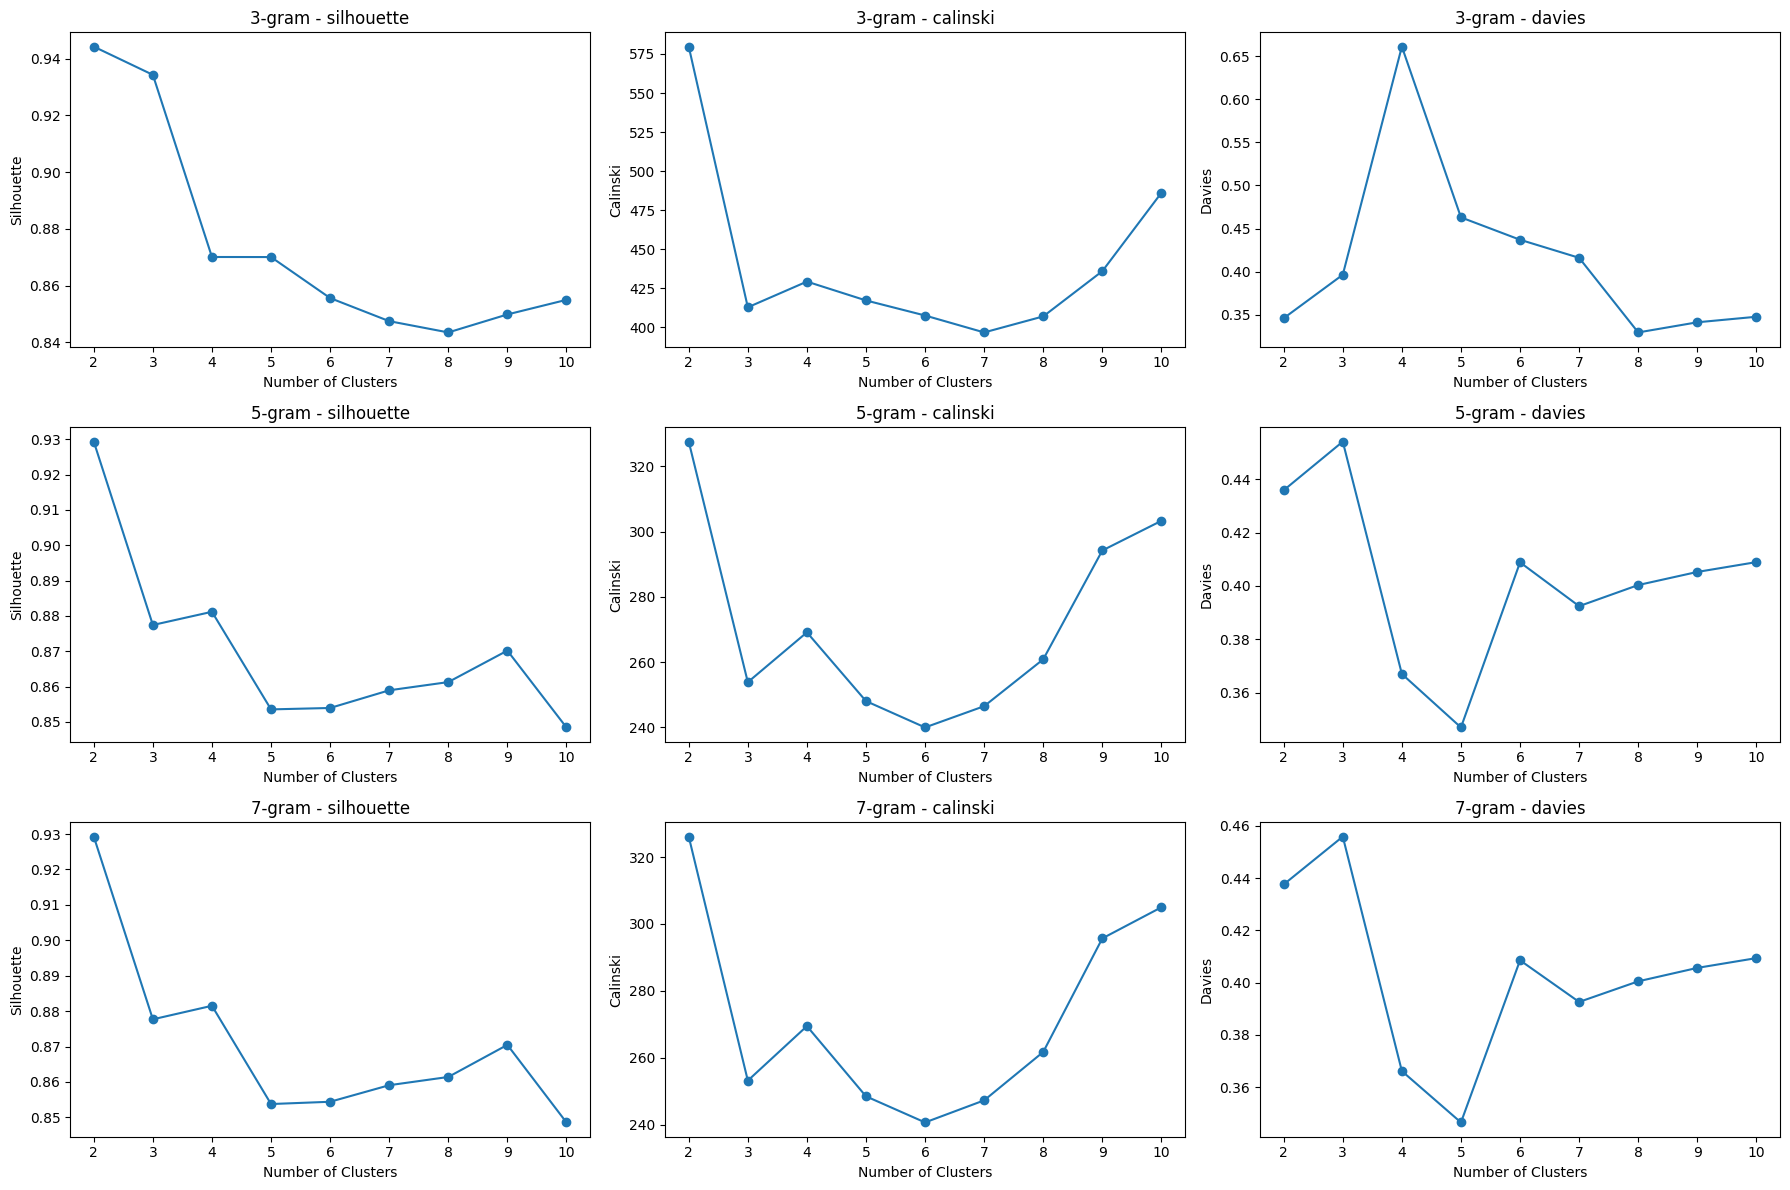

In [86]:
hierarchical_clustering(datasets)

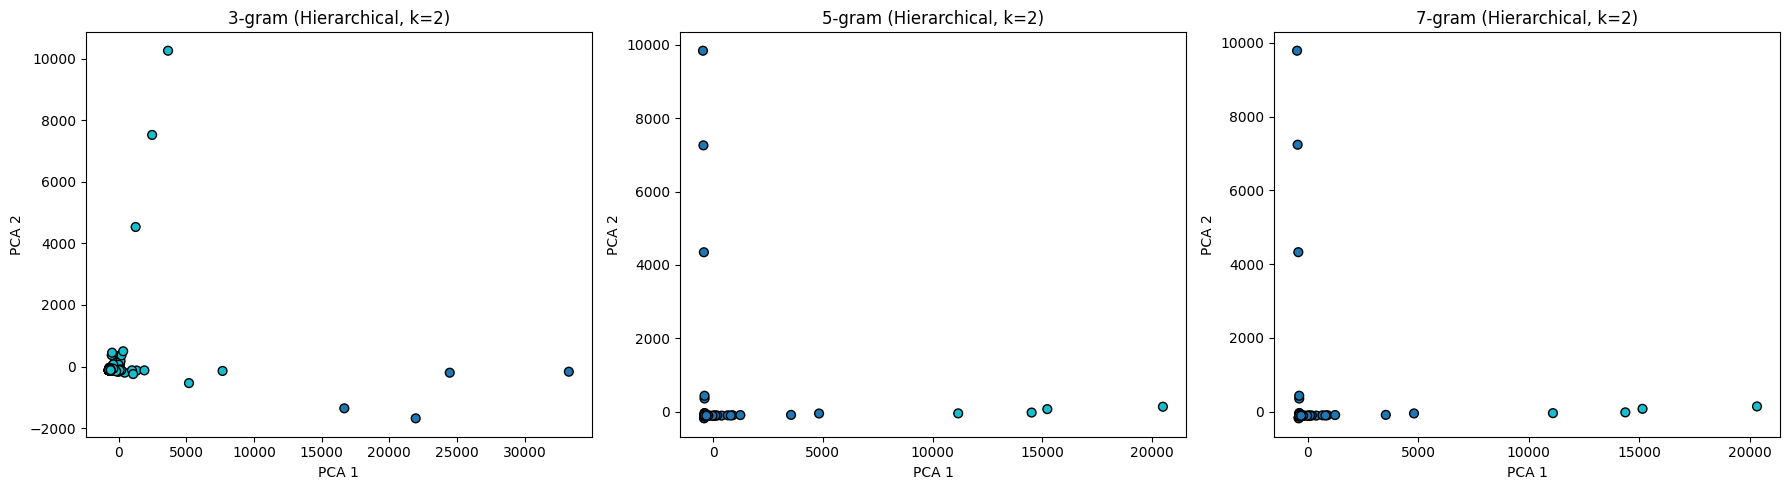

In [87]:
# PCA visualization
k = 2
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (ngram, data) in zip(axes, datasets.items()):
    pca = PCA(n_components=2, random_state=42)
    reduced = pca.fit_transform(data)
    
    model = AgglomerativeClustering(n_clusters=k)
    clusters = model.fit_predict(data)
    
    ax.scatter(reduced[:, 0], reduced[:, 1], c=clusters, cmap='tab10', s=40, edgecolor='k')
    ax.set_title(f"{ngram} (Hierarchical, k={k})")
    ax.set_xlabel("PCA 1")
    ax.set_ylabel("PCA 2")

plt.tight_layout()
plt.show()

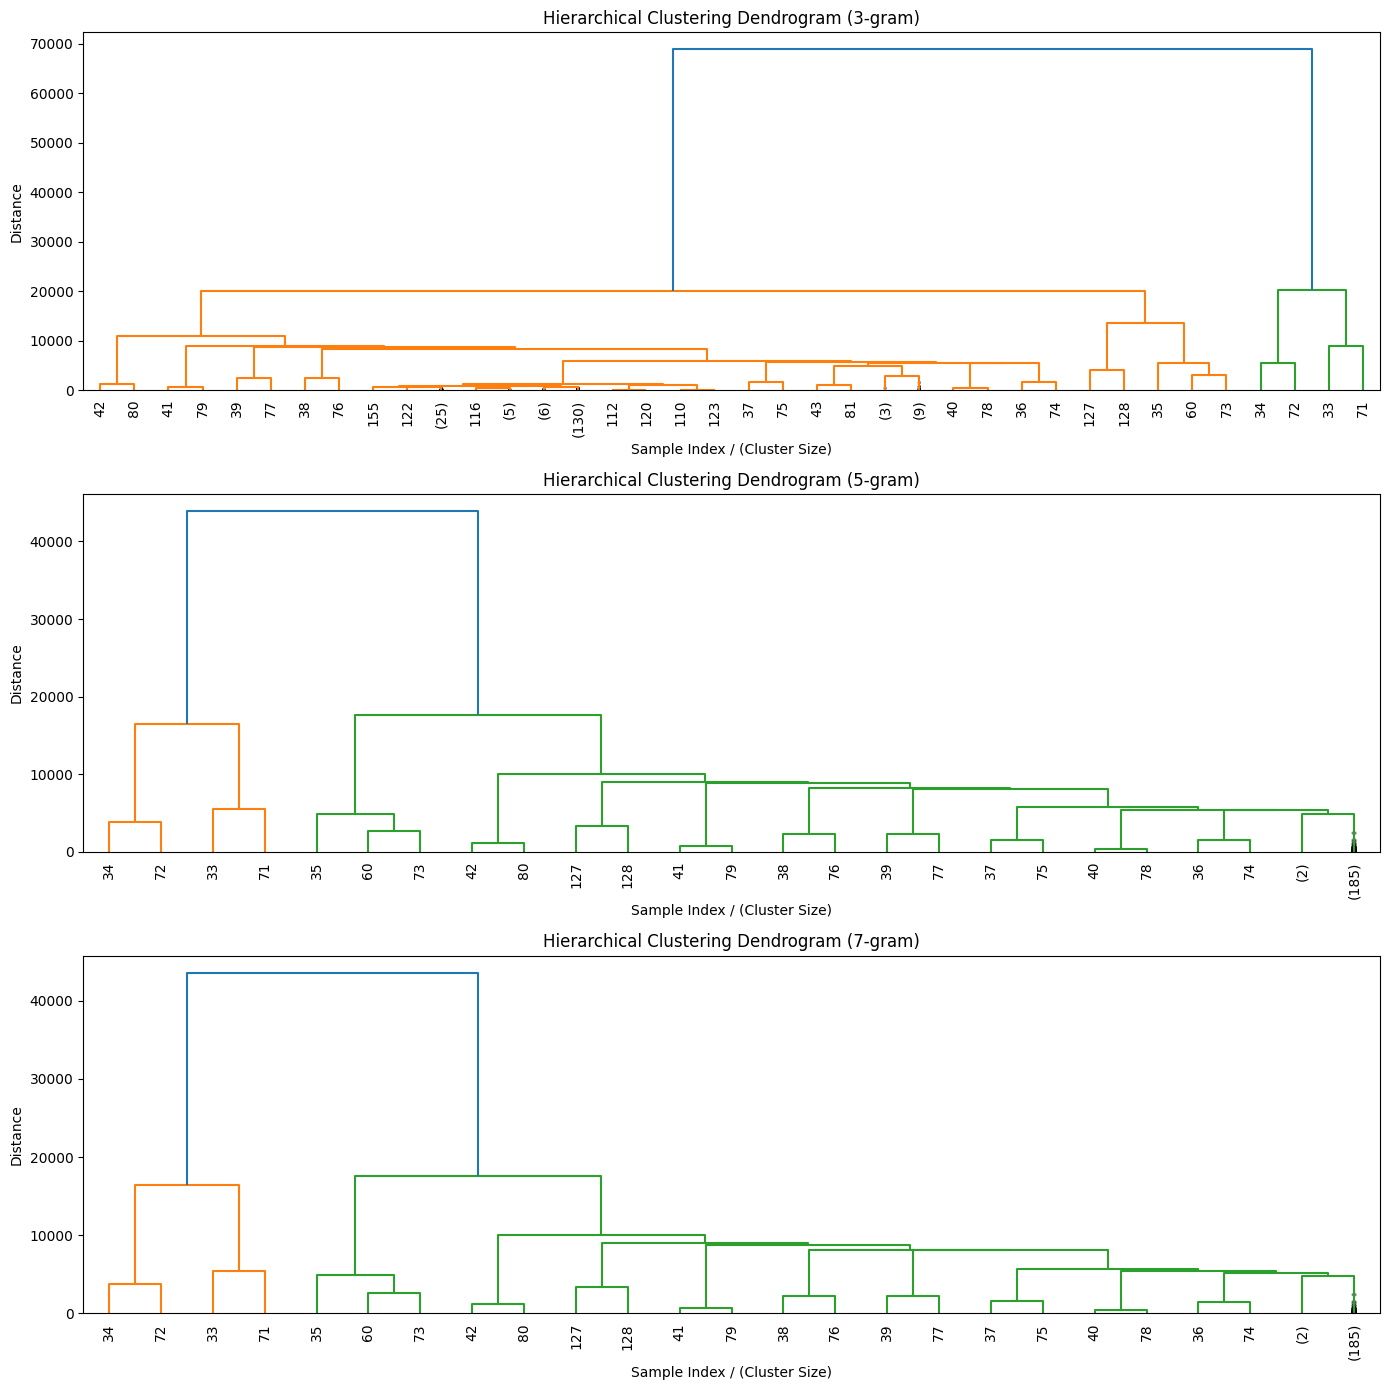

In [88]:
# Plot dendrograms
fig, axes = plt.subplots(3, 1, figsize=(14, 14))

for ax, (label, data) in zip(axes, datasets.items()):
    linked = linkage(data, method='ward')
    
    dendrogram(linked,
               truncate_mode='level',
               p=10,
               ax=ax,
               leaf_rotation=90.,
               leaf_font_size=10.,
               show_contracted=True)
    
    ax.set_title(f"Hierarchical Clustering Dendrogram ({label})")
    ax.set_xlabel("Sample Index / (Cluster Size)")
    ax.set_ylabel("Distance")

plt.tight_layout()
plt.show()

# SOM

In [1]:
from minisom import MiniSom
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
def som(datasets, label_column='virus_type', som_x=15, som_y=15, iterations=1000):
    """
    Trains and visualizes SOMs on amino acid n-gram datasets.
    Colors are based on an external label column (e.g., virus_type or protein_type).
    """
    results = []
    fig, axes = plt.subplots(len(datasets), 2, figsize=(12, 5 * len(datasets)))

    if len(datasets) == 1:
        axes = np.expand_dims(axes, axis=0)  # Ensure 2D axes indexing

    for i, (ngram, df) in enumerate(datasets.items()):
        labels = df[label_column].values
        features = df.drop(columns=['virus_type', 'protein_type']).values

        # Standardize feature data
        scaler = StandardScaler()
        features_scaled = scaler.fit_transform(features)

        # Train SOM
        som = MiniSom(x=som_x, y=som_y, input_len=features_scaled.shape[1], sigma=1.0, learning_rate=0.5)
        som.random_weights_init(features_scaled)
        som.train_random(features_scaled, num_iteration=iterations)

        # Get BMU coordinates
        bmu_coords = np.array([som.winner(x) for x in features_scaled])

        # Map labels to color indices
        unique_labels = sorted(set(labels))
        label_to_int = {label: idx for idx, label in enumerate(unique_labels)}
        color_labels = np.array([label_to_int[label] for label in labels])

        # Save number of unique BMUs (clusters)
        results.append({
            "n_gram": ngram,
            "n_clusters": len(np.unique(bmu_coords, axis=0))
        })

        # Plot 1: U-Matrix
        ax1 = axes[i, 0]
        ax1.set_title(f"SOM U-Matrix ({ngram})")
        im = ax1.pcolor(som.distance_map().T, cmap='bone_r')
        fig.colorbar(im, ax=ax1)

        # Plot 2: Sample positions, colored by external label
        ax2 = axes[i, 1]
        ax2.set_title(f"SOM Colored by {label_column} ({ngram})")
        scatter = ax2.scatter(bmu_coords[:, 0], bmu_coords[:, 1], c=color_labels, cmap='tab10', s=40)
        ax2.set_xlim(0, som_x)
        ax2.set_ylim(0, som_y)
        ax2.legend(handles=scatter.legend_elements()[0], labels=unique_labels, title=label_column)

    plt.tight_layout()
    plt.show()

    return results

In [3]:
df3 = pd.read_csv("../csv_data/3gram_matrix_amino_acid_combined.csv")
df4 = pd.read_csv("../csv_data/4gram_matrix_amino_acid_combined.csv")
df5 = pd.read_csv("../csv_data/5gram_matrix_amino_acid_combined.csv")
datasets = {"3-gram": df3, "4-gram": df4, "5-gram": df5}

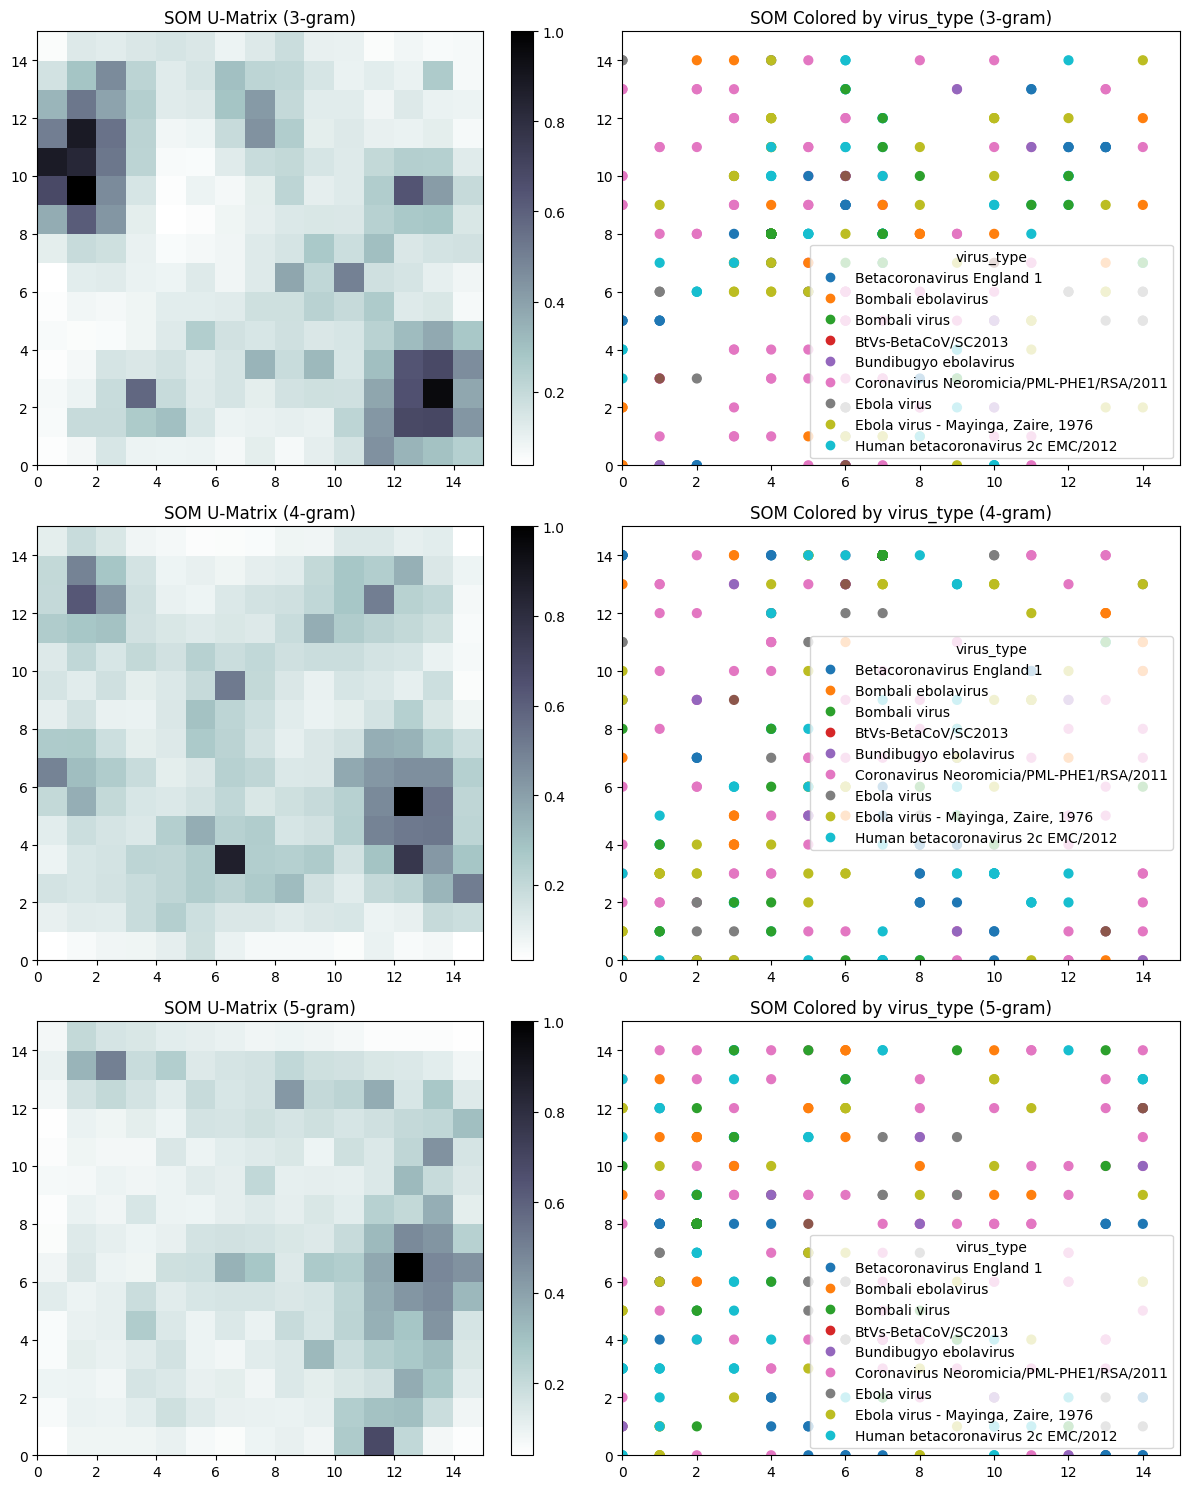

[{'n_gram': '3-gram', 'n_clusters': 141},
 {'n_gram': '4-gram', 'n_clusters': 158},
 {'n_gram': '5-gram', 'n_clusters': 168}]

In [4]:
som(datasets, label_column='virus_type')

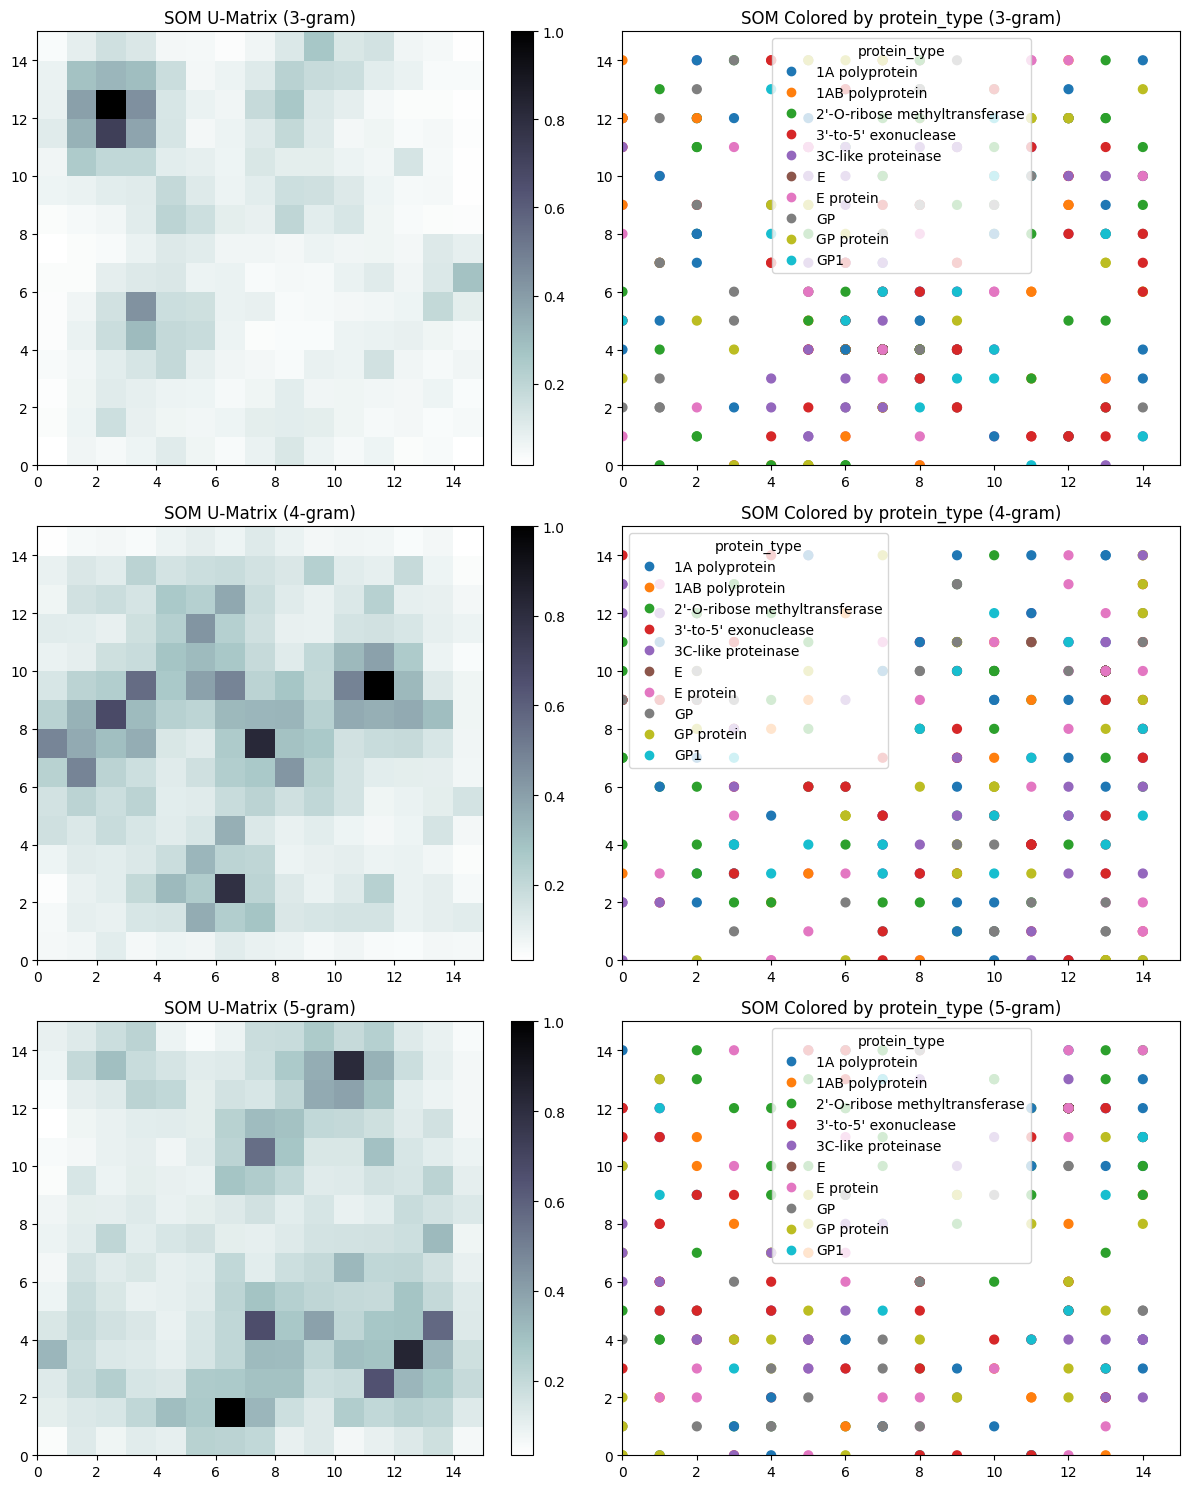

[{'n_gram': '3-gram', 'n_clusters': 158},
 {'n_gram': '4-gram', 'n_clusters': 160},
 {'n_gram': '5-gram', 'n_clusters': 155}]

In [5]:
som(datasets, label_column='protein_type')